# Name - Sourav Kumar Singh

# Batch - DS2401

# Rainfall Weather Forecast  Project

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv"  # Replace with the correct raw URL
df = pd.read_csv(url, error_bad_lines=False)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# First we predict tomorrow will rain or not

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


# Exploratory Data Analysis

In [6]:
# Checking the dimension of the dataset
df.shape

(8425, 23)

Here we can see that in  datasets there are 8425 rows and 23 columns

In [7]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (8425, 23)
The column headers : Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
# checking the types of columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [11]:
# Now checking null values in this dataset
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64


4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64


0

# Fill all null values

In [13]:
# Filling null vlaues in MinTemp with its mean
df['MinTemp']= df['MinTemp'].fillna(df['MinTemp'].mean())

In [14]:
# Filling null vlaues in WindGustSpeed with its mean
df['WindGustSpeed']= df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

In [15]:
# Filling null vlaues in MaxTempMaxTemp with its mean
df['MaxTemp']= df['MaxTemp'].fillna(df['MaxTemp'].mean())

In [16]:
# Filling null vlaues in Rainfall with its mean
df['Rainfall']= df['Rainfall'].fillna(df['Rainfall'].mean())

In [17]:
# Filling null vlaues in Sunshine with its mean
df['Sunshine']= df['Sunshine'].fillna(df['Sunshine'].mean())

In [18]:
df['WindDir9am'] = df['WindDir9am'].fillna("N")

In [19]:
df['WindDir3pm'] = df['WindDir3pm'].fillna("SE")

In [20]:
# Filling null vlaues in WindSpeed9am with its mean
df['WindSpeed9am']= df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

In [21]:
# Filling null vlaues in WindSpeed3pm with its mean
df['WindSpeed3pm']= df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

In [22]:
# Filling null vlaues in Humidity3pm with its mean
df['Humidity3pm']= df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [23]:
df['WindGustDir'] = df['WindGustDir'].fillna("N")

In [24]:
# Filling null vlaues in Humidity9am with its mean
df['Humidity9am']= df['Humidity9am'].fillna(df['Humidity9am'].mean())

In [25]:
# Filling null vlaues in Pressure9am with its mean
df['Pressure9am']= df['Pressure9am'].fillna(df['Pressure9am'].mean())

In [26]:
# Filling null vlaues in Pressure3pm with its mean
df['Pressure3pm']= df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

In [27]:
# Filling null vlaues in Cloud9am with its mean
df['Cloud9am']= df['Cloud9am'].fillna(df['Cloud9am'].mean())

In [28]:
# Filling null vlaues in Cloud3pm with its mean
df['Cloud3pm']= df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [29]:
# Filling null vlaues in Evaporation with its mean
df['Evaporation']= df['Evaporation'].fillna(df['Evaporation'].mean())

In [30]:
# Filling null vlaues in Temp9am with its mean
df['Temp9am']= df['Temp9am'].fillna(df['Temp9am'].mean())

In [31]:
df['RainToday'] = df['RainToday'].fillna("No")

In [32]:
df['RainTomorrow'] = df['RainTomorrow'].fillna("No")

In [33]:
# Filling null vlaues in Temp3pm with its mean
df['Temp3pm']= df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [34]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


# Now again we check null values after fill all values

In [35]:
# Now checking null values in this dataset
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now no null values are present 

<Axes: ylabel='Date'>

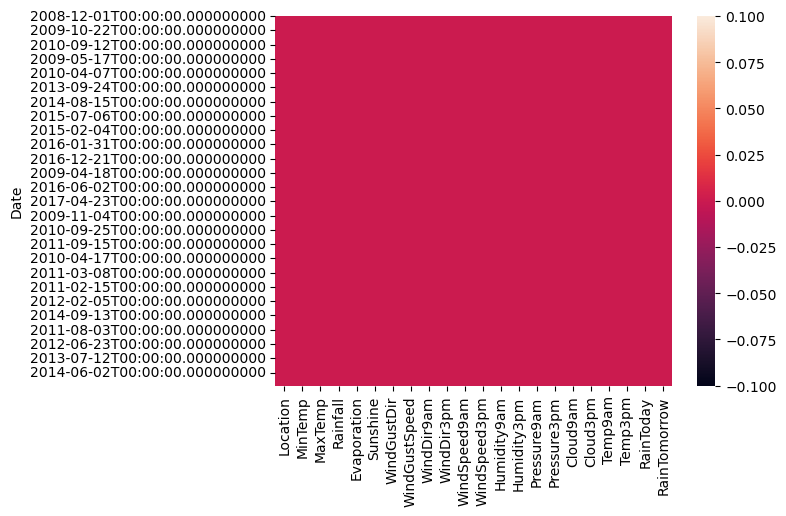

In [36]:
# Lets visualize itusing heatmap
sns.heatmap(df.isnull())

In [37]:
# Now checking the datatypes
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [38]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numercial_col : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [39]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

,No. of uniques values
Location,12
MinTemp,286
MaxTemp,332
Rainfall,251
Evaporation,117
Sunshine,141
WindGustDir,16
WindGustSpeed,53
WindDir9am,16
WindDir3pm,16


In [40]:
df["Location"].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [41]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [42]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [43]:
df["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [44]:
df["Cloud9am"].unique()

array([8.        , 4.56662225, 7.        , 1.        , 0.        ,
       5.        , 4.        , 2.        , 6.        , 3.        ])

In [45]:
df["Cloud3pm"].unique()

array([4.50318258, 2.        , 8.        , 7.        , 1.        ,
       5.        , 4.        , 6.        , 3.        , 0.        ])

In [46]:
df["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

# Data Visualization

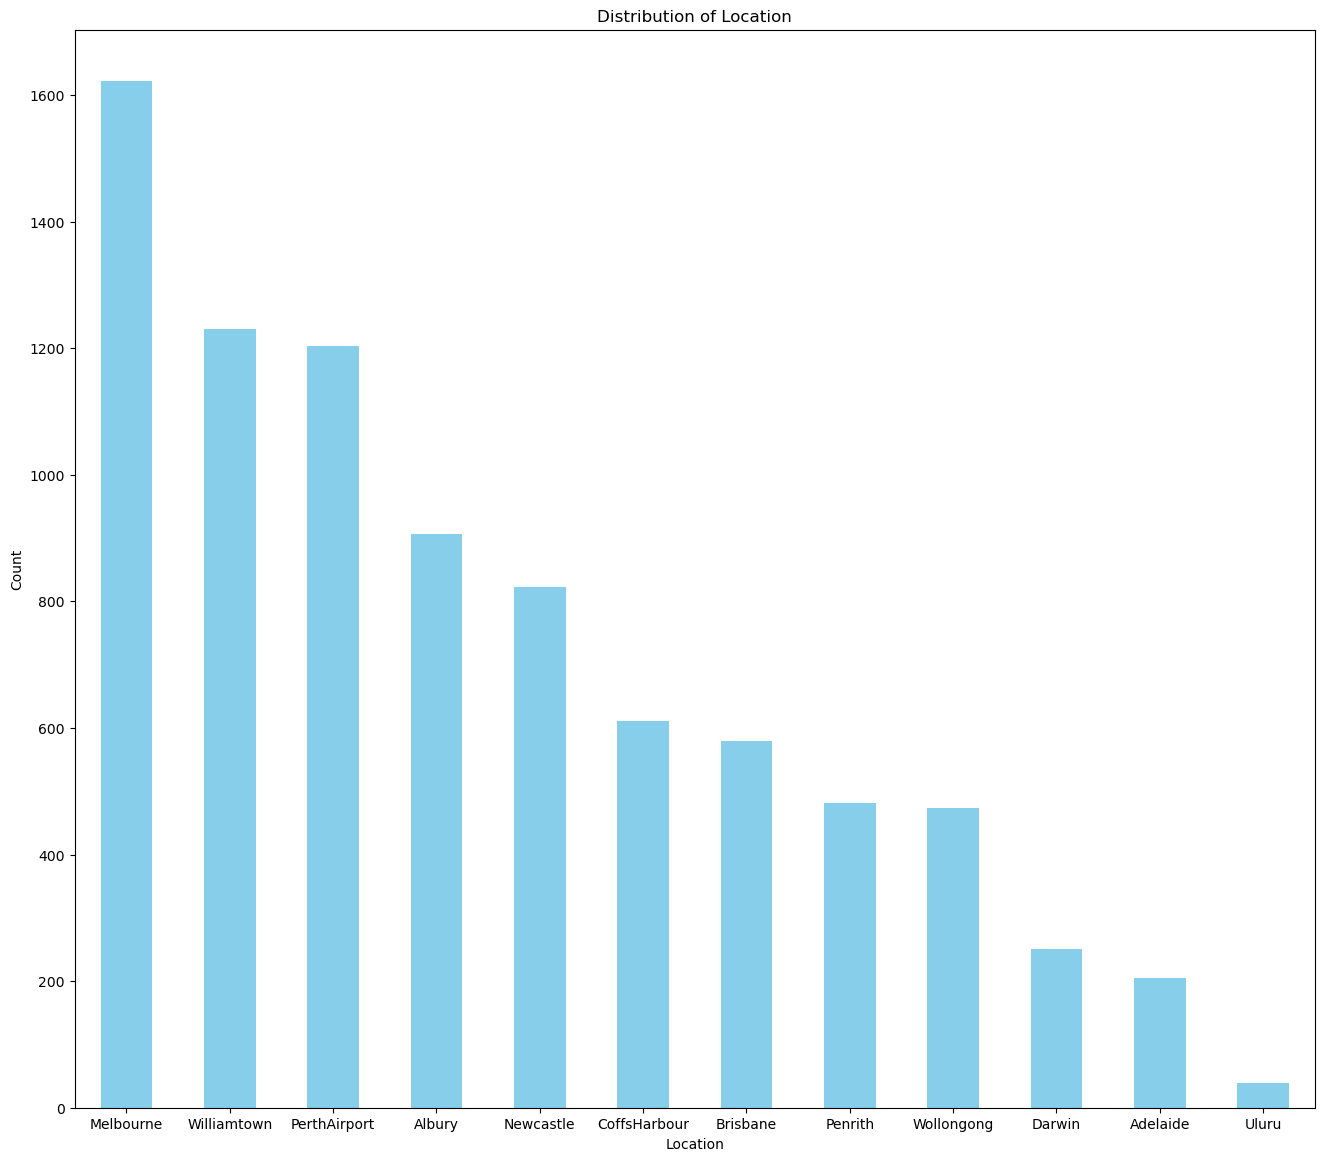

In [48]:
# Assuming df is your DataFrame and it has a column named 'Location'
location = df["Location"].value_counts()
plt.figure(figsize=(16,14))
location.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

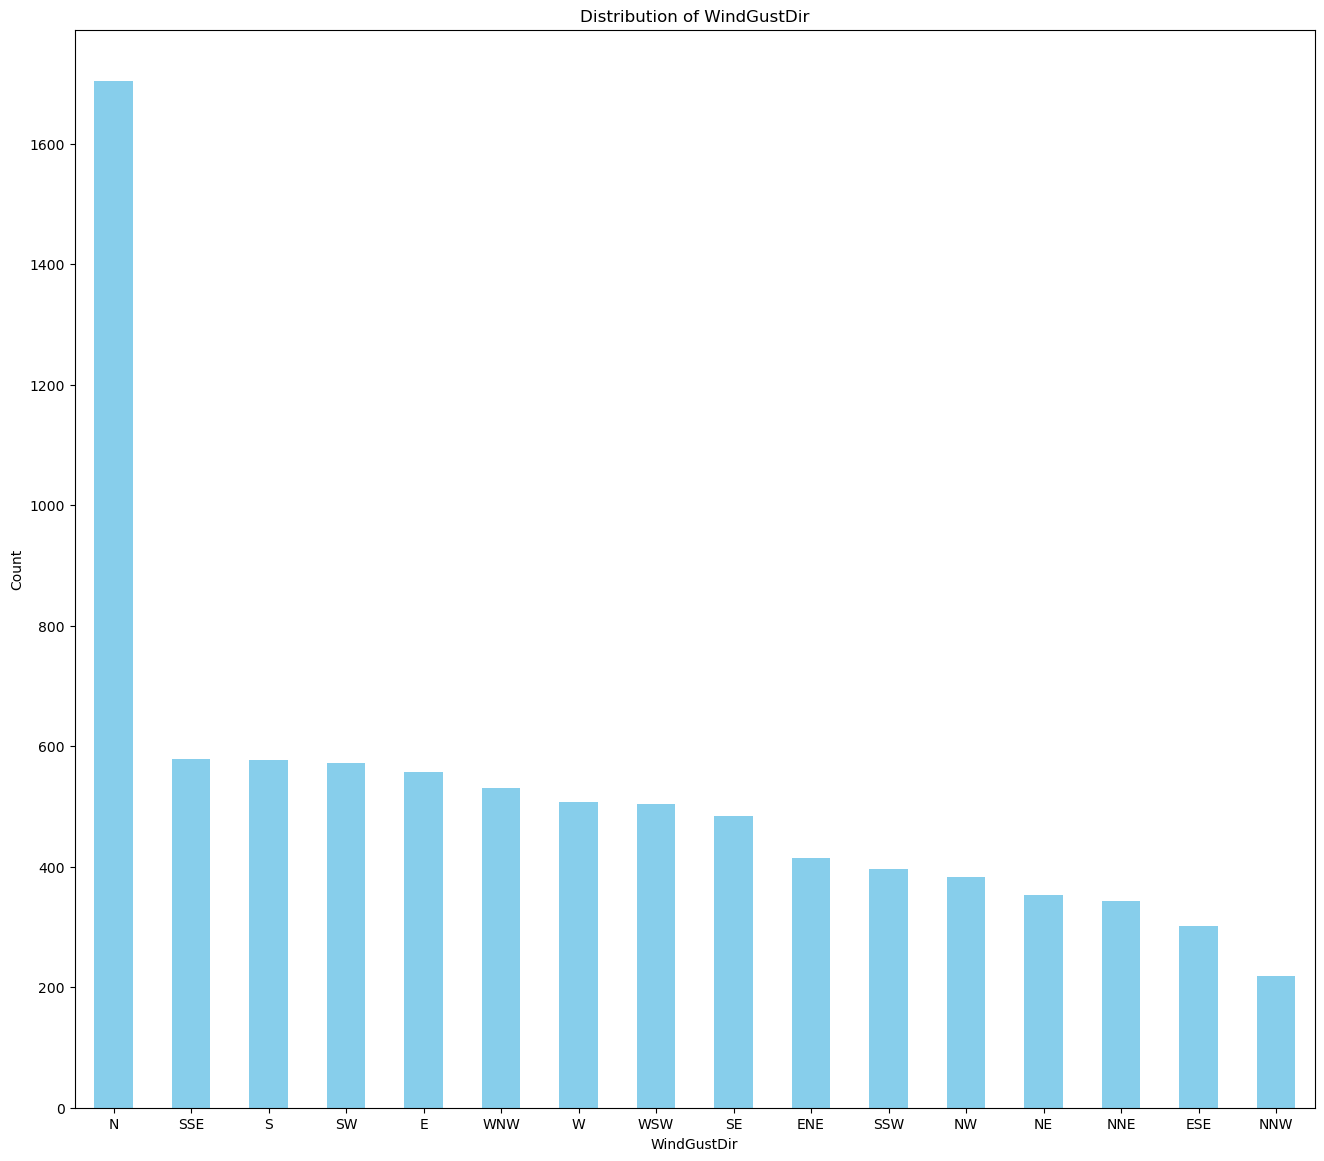

In [49]:
# Assuming df is your DataFrame and it has a column named 'WindGustDir'
WindGustDir = df["WindGustDir"].value_counts()
plt.figure(figsize=(16,14))
WindGustDir.plot(kind='bar', color='Skyblue')
plt.title("Distribution of WindGustDir")
plt.xlabel("WindGustDir")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

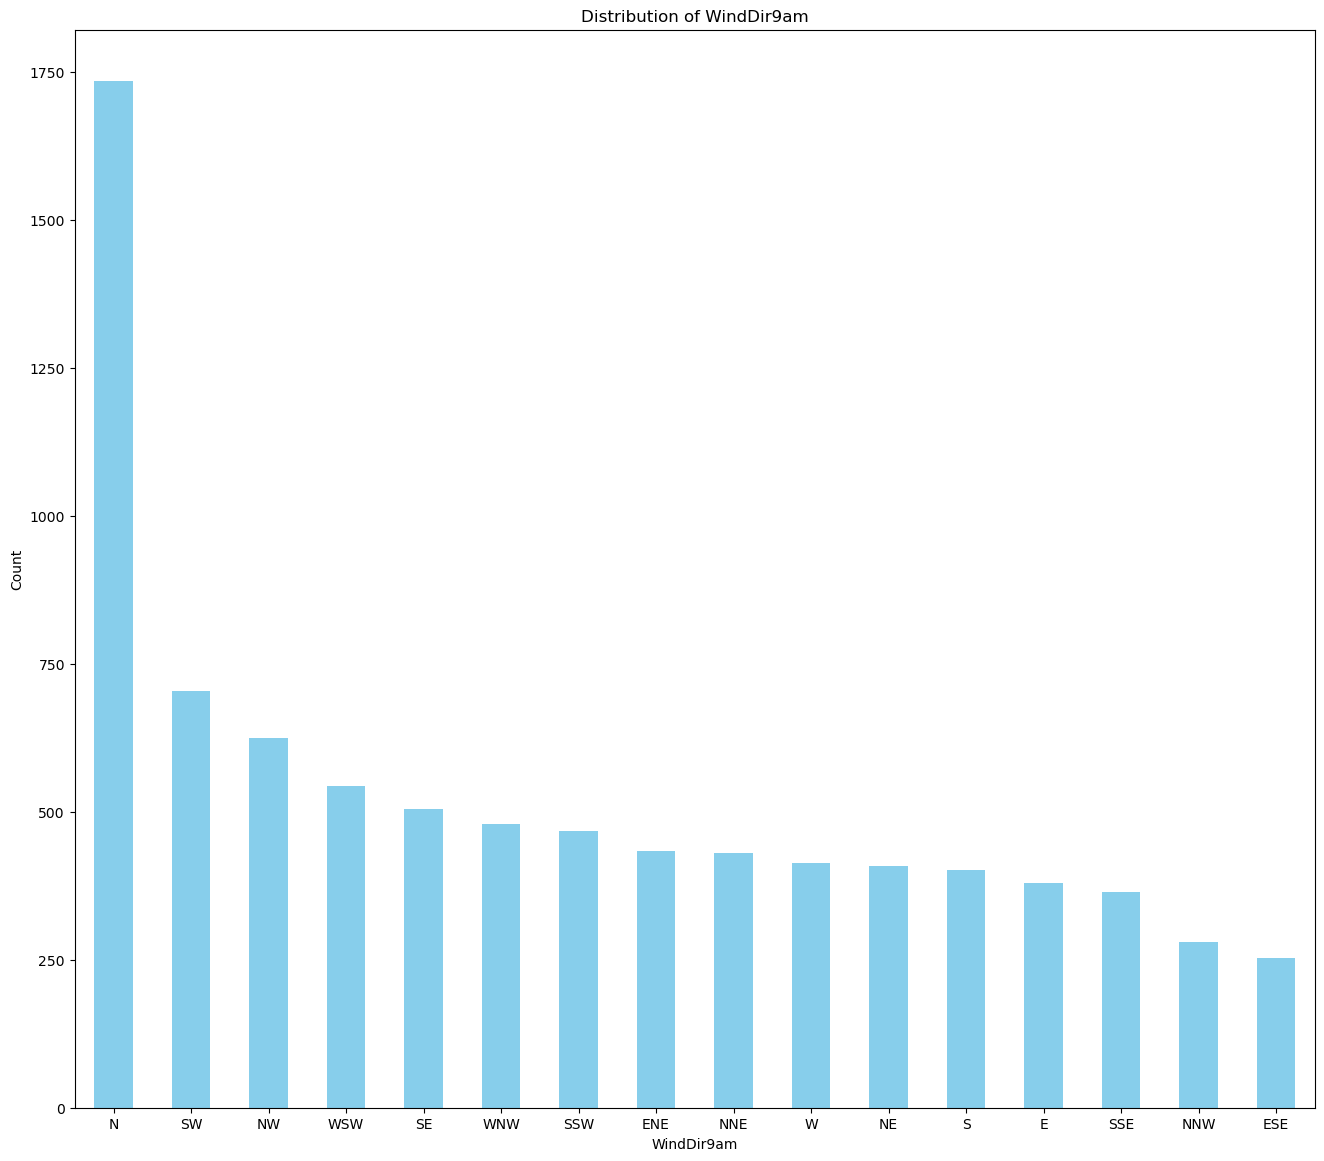

In [50]:
# Assuming df is your DataFrame and it has a column named 'WindDir9am'
WindDir9am = df["WindDir9am"].value_counts()
plt.figure(figsize=(16,14))
WindDir9am.plot(kind='bar', color='Skyblue')
plt.title("Distribution of WindDir9am")
plt.xlabel("WindDir9am")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

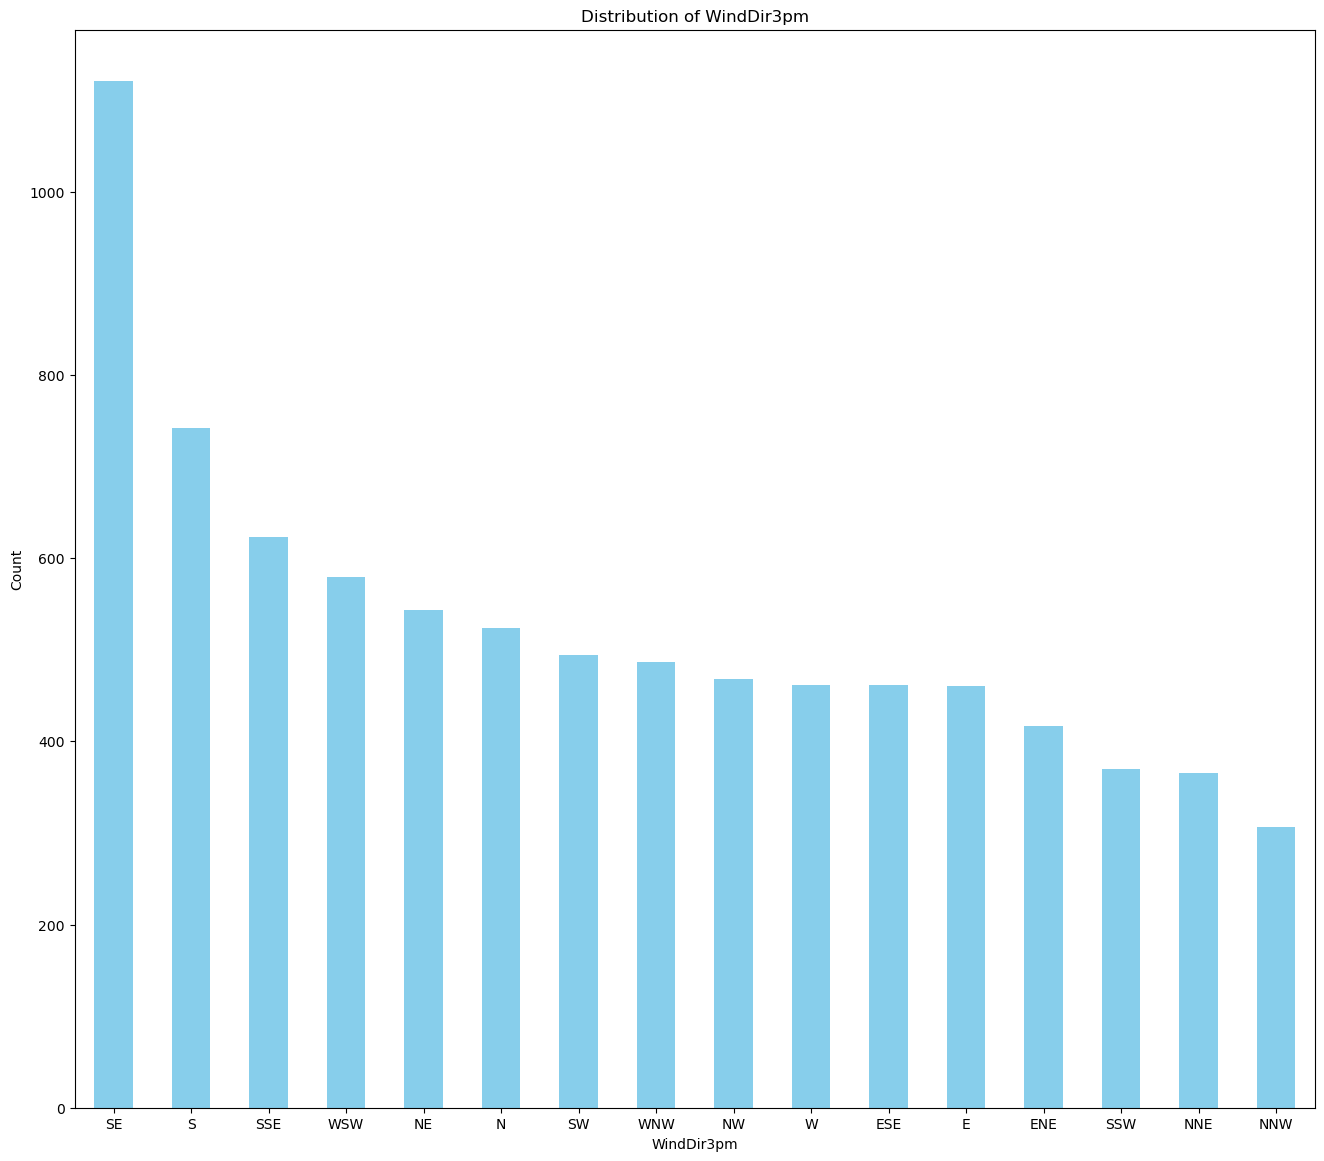

In [51]:
# Assuming df is your DataFrame and it has a column named 'WindDir3pm'
WindDir3pm = df["WindDir3pm"].value_counts()
plt.figure(figsize=(16,14))
WindDir3pm.plot(kind='bar', color='Skyblue')
plt.title("Distribution of WindDir3pm")
plt.xlabel("WindDir3pm")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

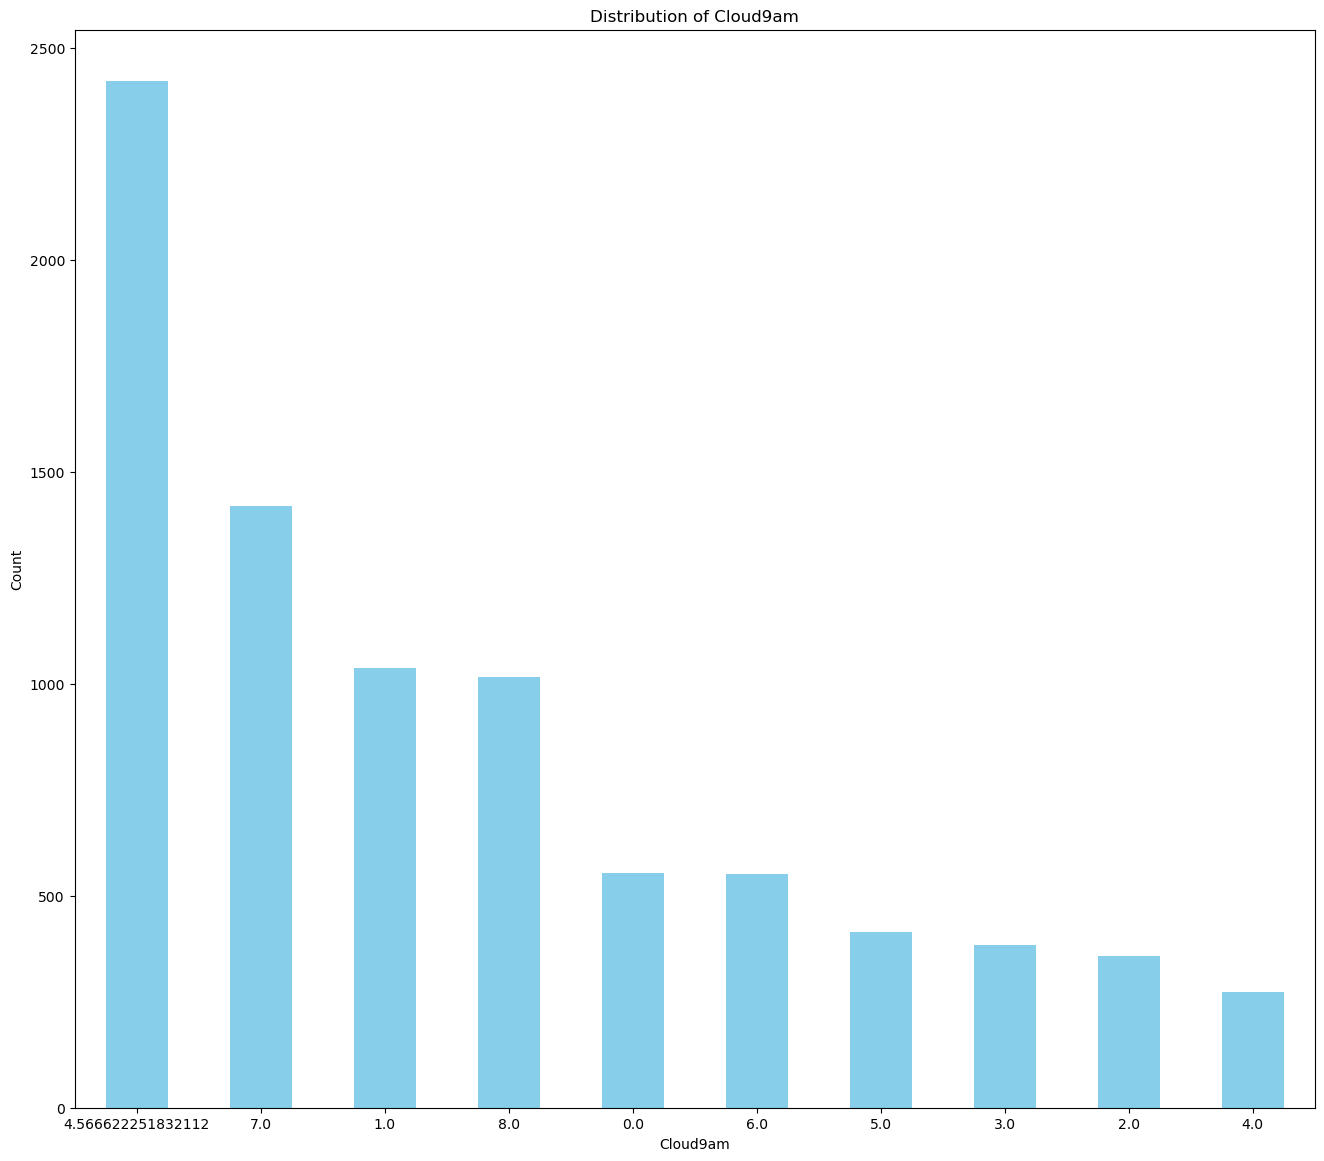

In [52]:
# Assuming df is your DataFrame and it has a column named 'Cloud9am'
Cloud9am = df["Cloud9am"].value_counts()
plt.figure(figsize=(16,14))
Cloud9am.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Cloud9am")
plt.xlabel("Cloud9am")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

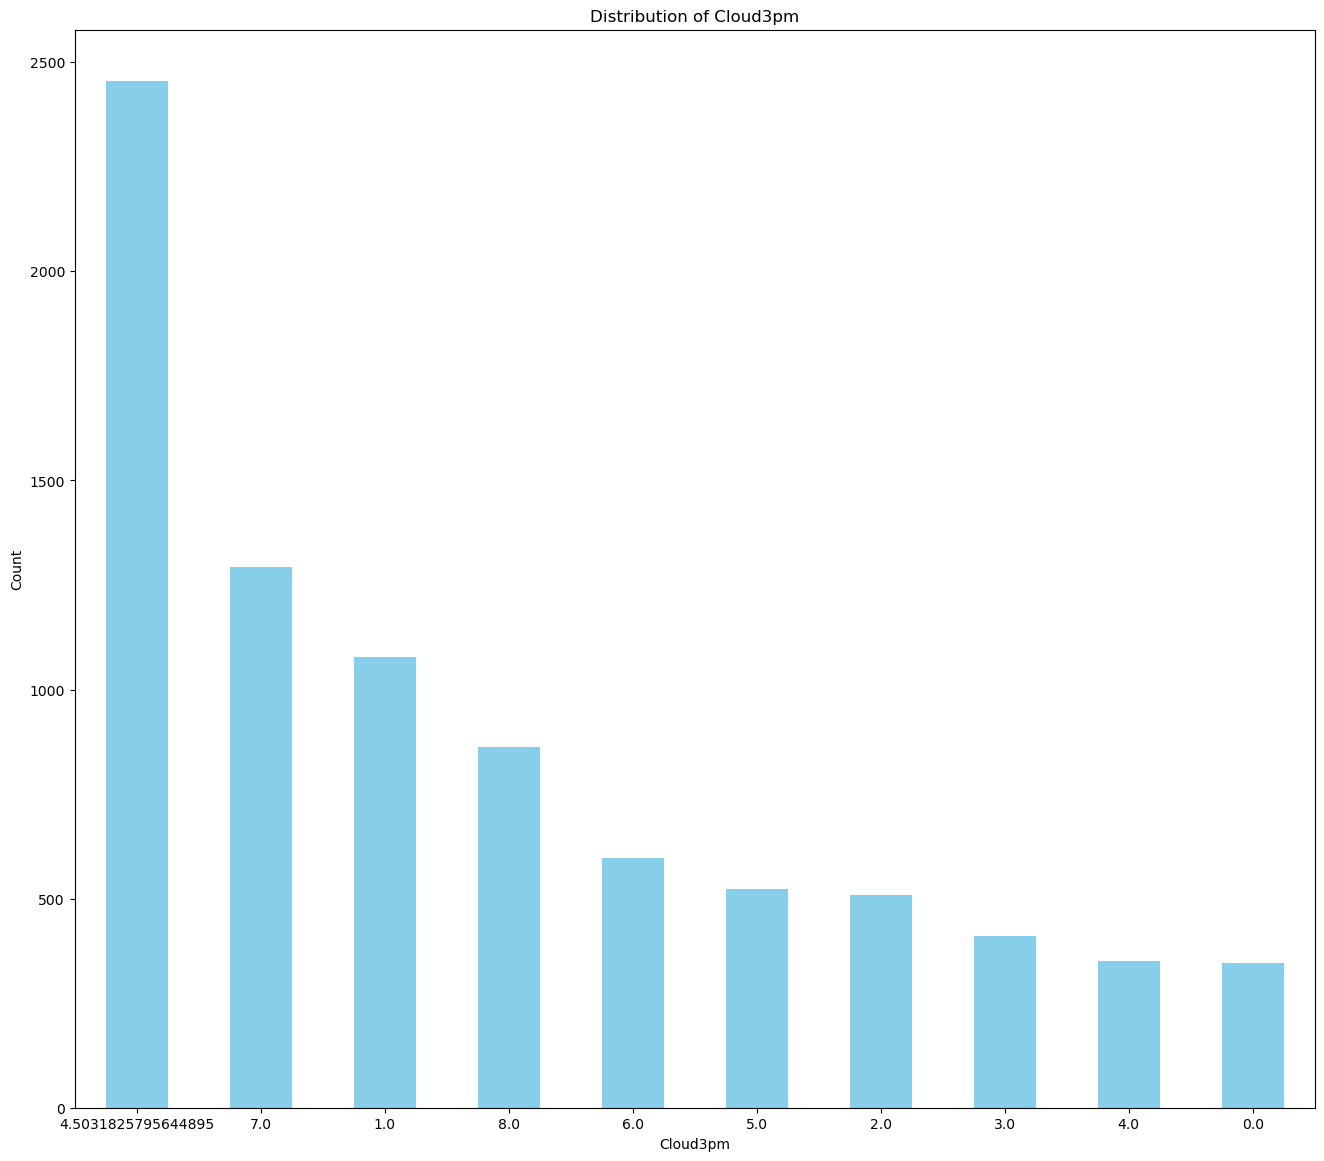

In [53]:
# Assuming df is your DataFrame and it has a column named 'Cloud3pm'
Cloud3pm = df["Cloud3pm"].value_counts()
plt.figure(figsize=(16,14))
Cloud3pm.plot(kind='bar', color='Skyblue')
plt.title("Distribution of Cloud3pm")
plt.xlabel("Cloud3pm")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

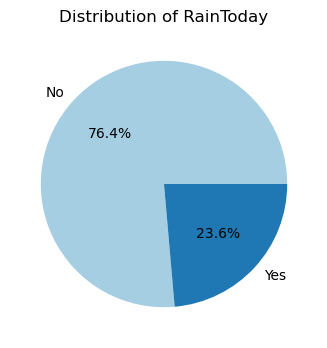

In [54]:
# Assuming df is your DataFrame and it has a column named 'RainToday'
RainToday = df["RainToday"].value_counts()

plt.figure(figsize=(8,4))
RainToday.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of RainToday")
plt.ylabel("")  # Hide the y-label

plt.show()

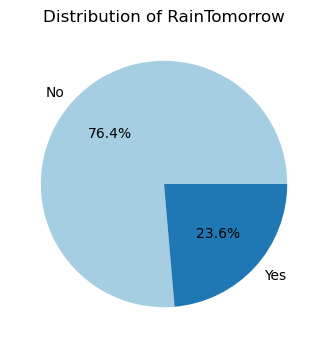

In [55]:
# Assuming df is your DataFrame and it has a column named 'RainTomorrow'
RainTomorrow = df["RainTomorrow"].value_counts()

plt.figure(figsize=(8,4))
RainTomorrow.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of RainTomorrow")
plt.ylabel("")  # Hide the y-label

plt.show()

# Relational Analysis

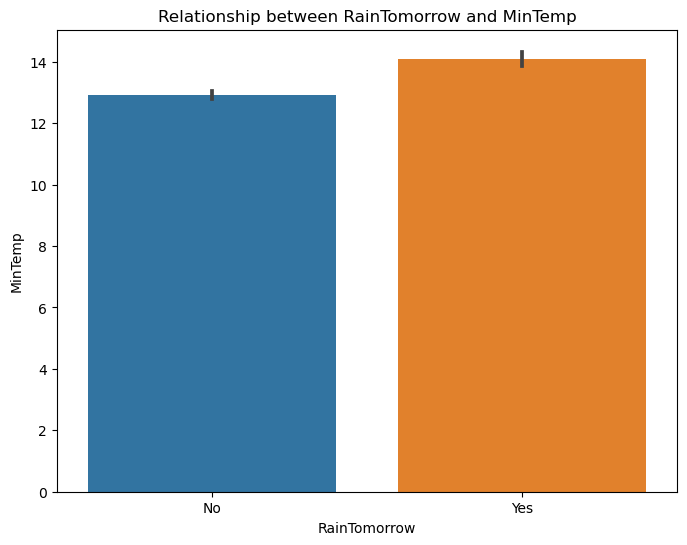

In [56]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="MinTemp", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("MinTemp")
plt.title("Relationship between RainTomorrow and MinTemp")

# Show the plot
plt.show()

In [57]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numercial_col : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


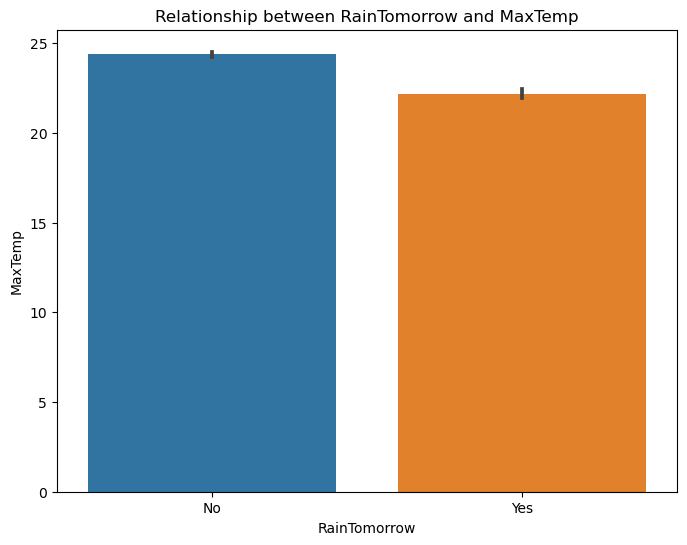

In [58]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="MaxTemp", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("MaxTemp")
plt.title("Relationship between RainTomorrow and MaxTemp")

# Show the plot
plt.show()

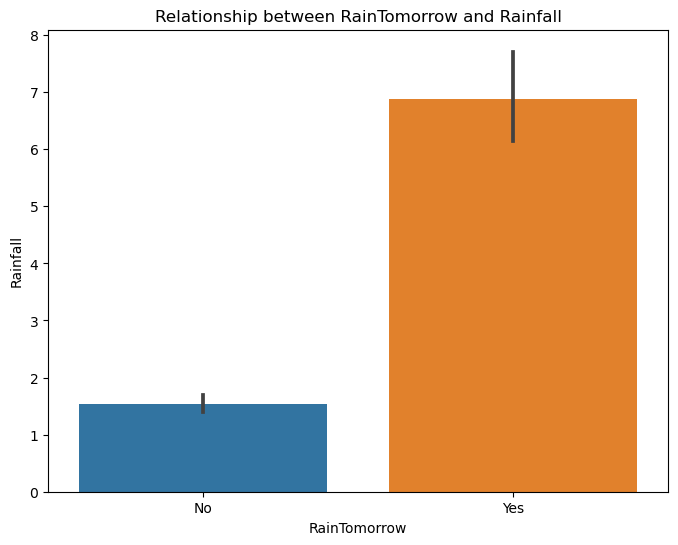

In [59]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="Rainfall", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("Rainfall")
plt.title("Relationship between RainTomorrow and Rainfall")

# Show the plot
plt.show()

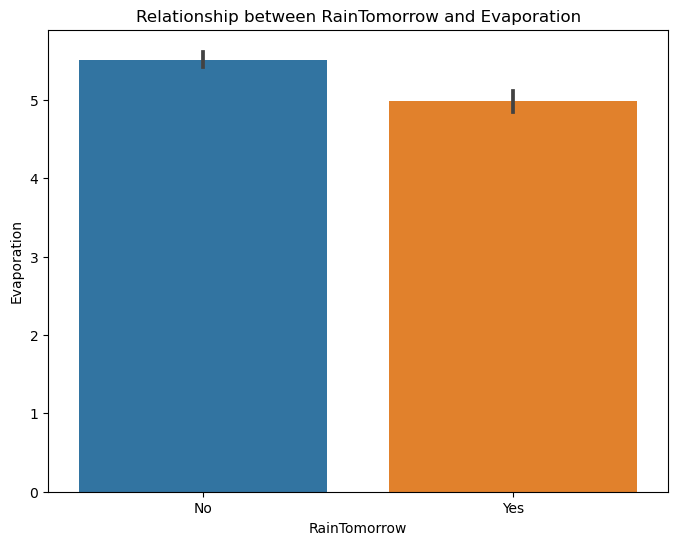

In [60]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="Evaporation", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("Evaporation")
plt.title("Relationship between RainTomorrow and Evaporation")

# Show the plot
plt.show()

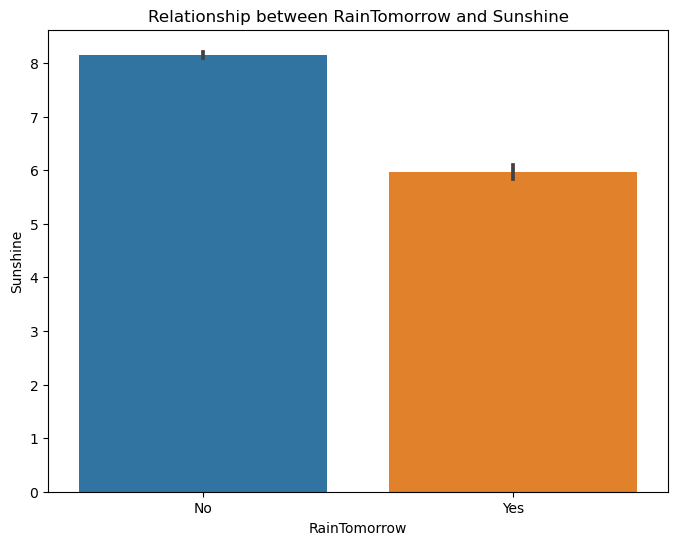

In [61]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="Sunshine", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("Sunshine")
plt.title("Relationship between RainTomorrow and Sunshine")

# Show the plot
plt.show()

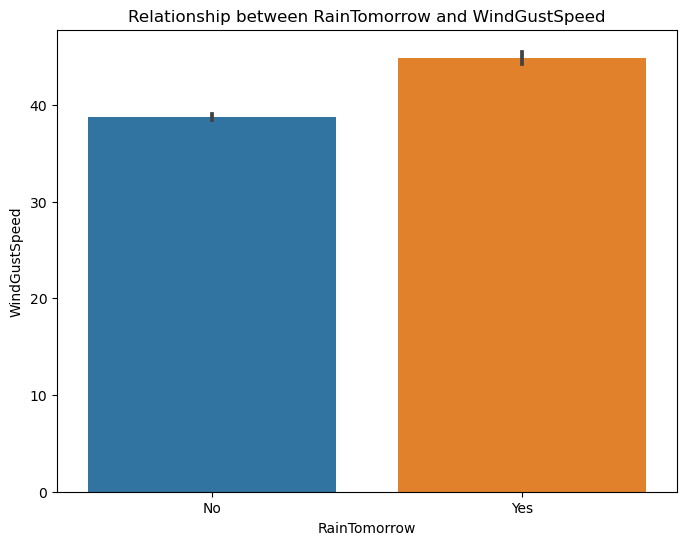

In [62]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="WindGustSpeed", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("WindGustSpeed")
plt.title("Relationship between RainTomorrow and WindGustSpeed")

# Show the plot
plt.show()

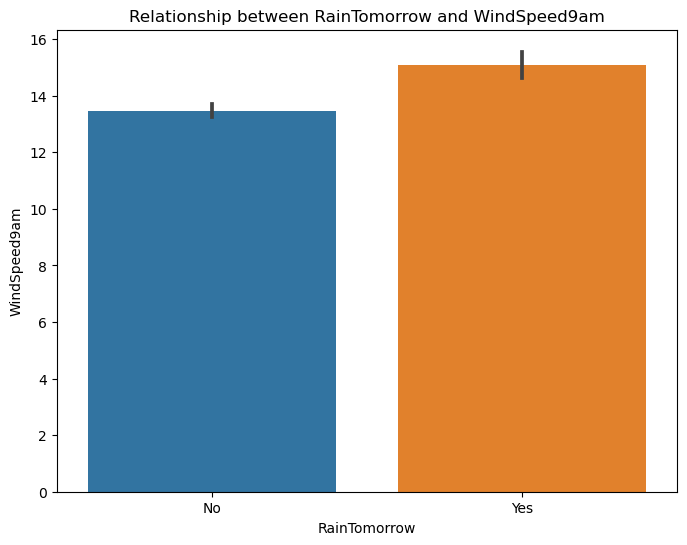

In [63]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="WindSpeed9am", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("WindSpeed9am")
plt.title("Relationship between RainTomorrow and WindSpeed9am")

# Show the plot
plt.show()

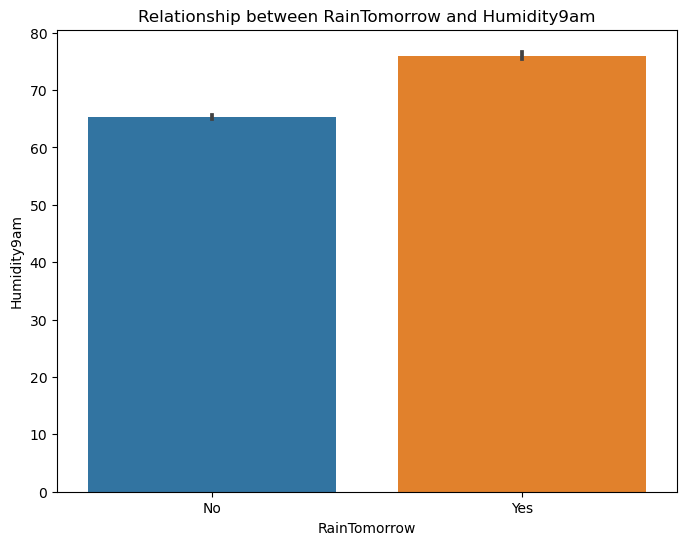

In [64]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainTomorrow", y="Humidity9am", data=df)

# Set labels and title
plt.xlabel("RainTomorrow")
plt.ylabel("Humidity9am")
plt.title("Relationship between RainTomorrow and Humidity9am")

# Show the plot
plt.show()

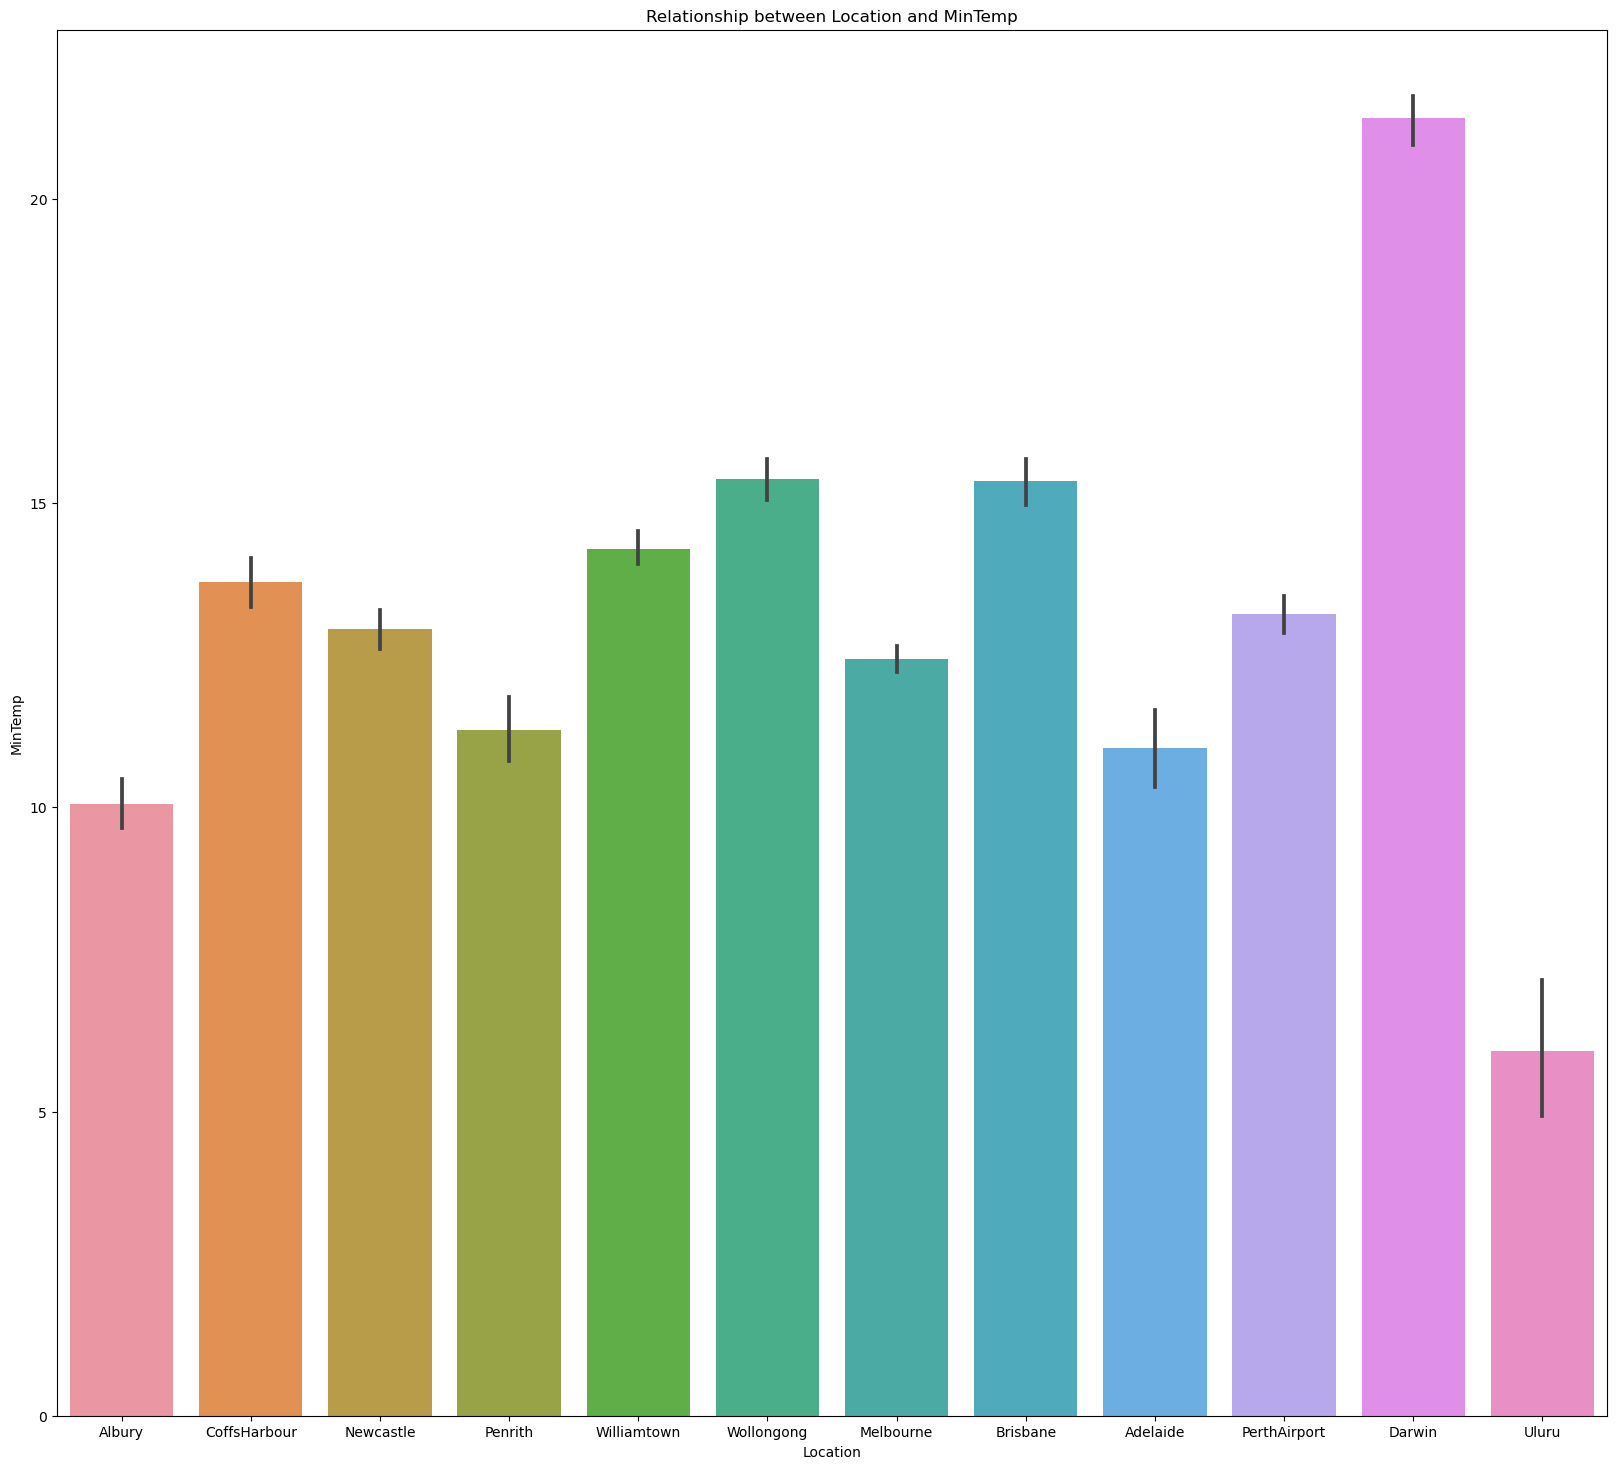

In [65]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Location", y="MinTemp", data=df)

# Set labels and title
plt.xlabel("Location")
plt.ylabel("MinTemp")
plt.title("Relationship between Location and MinTemp")

# Show the plot
plt.show()

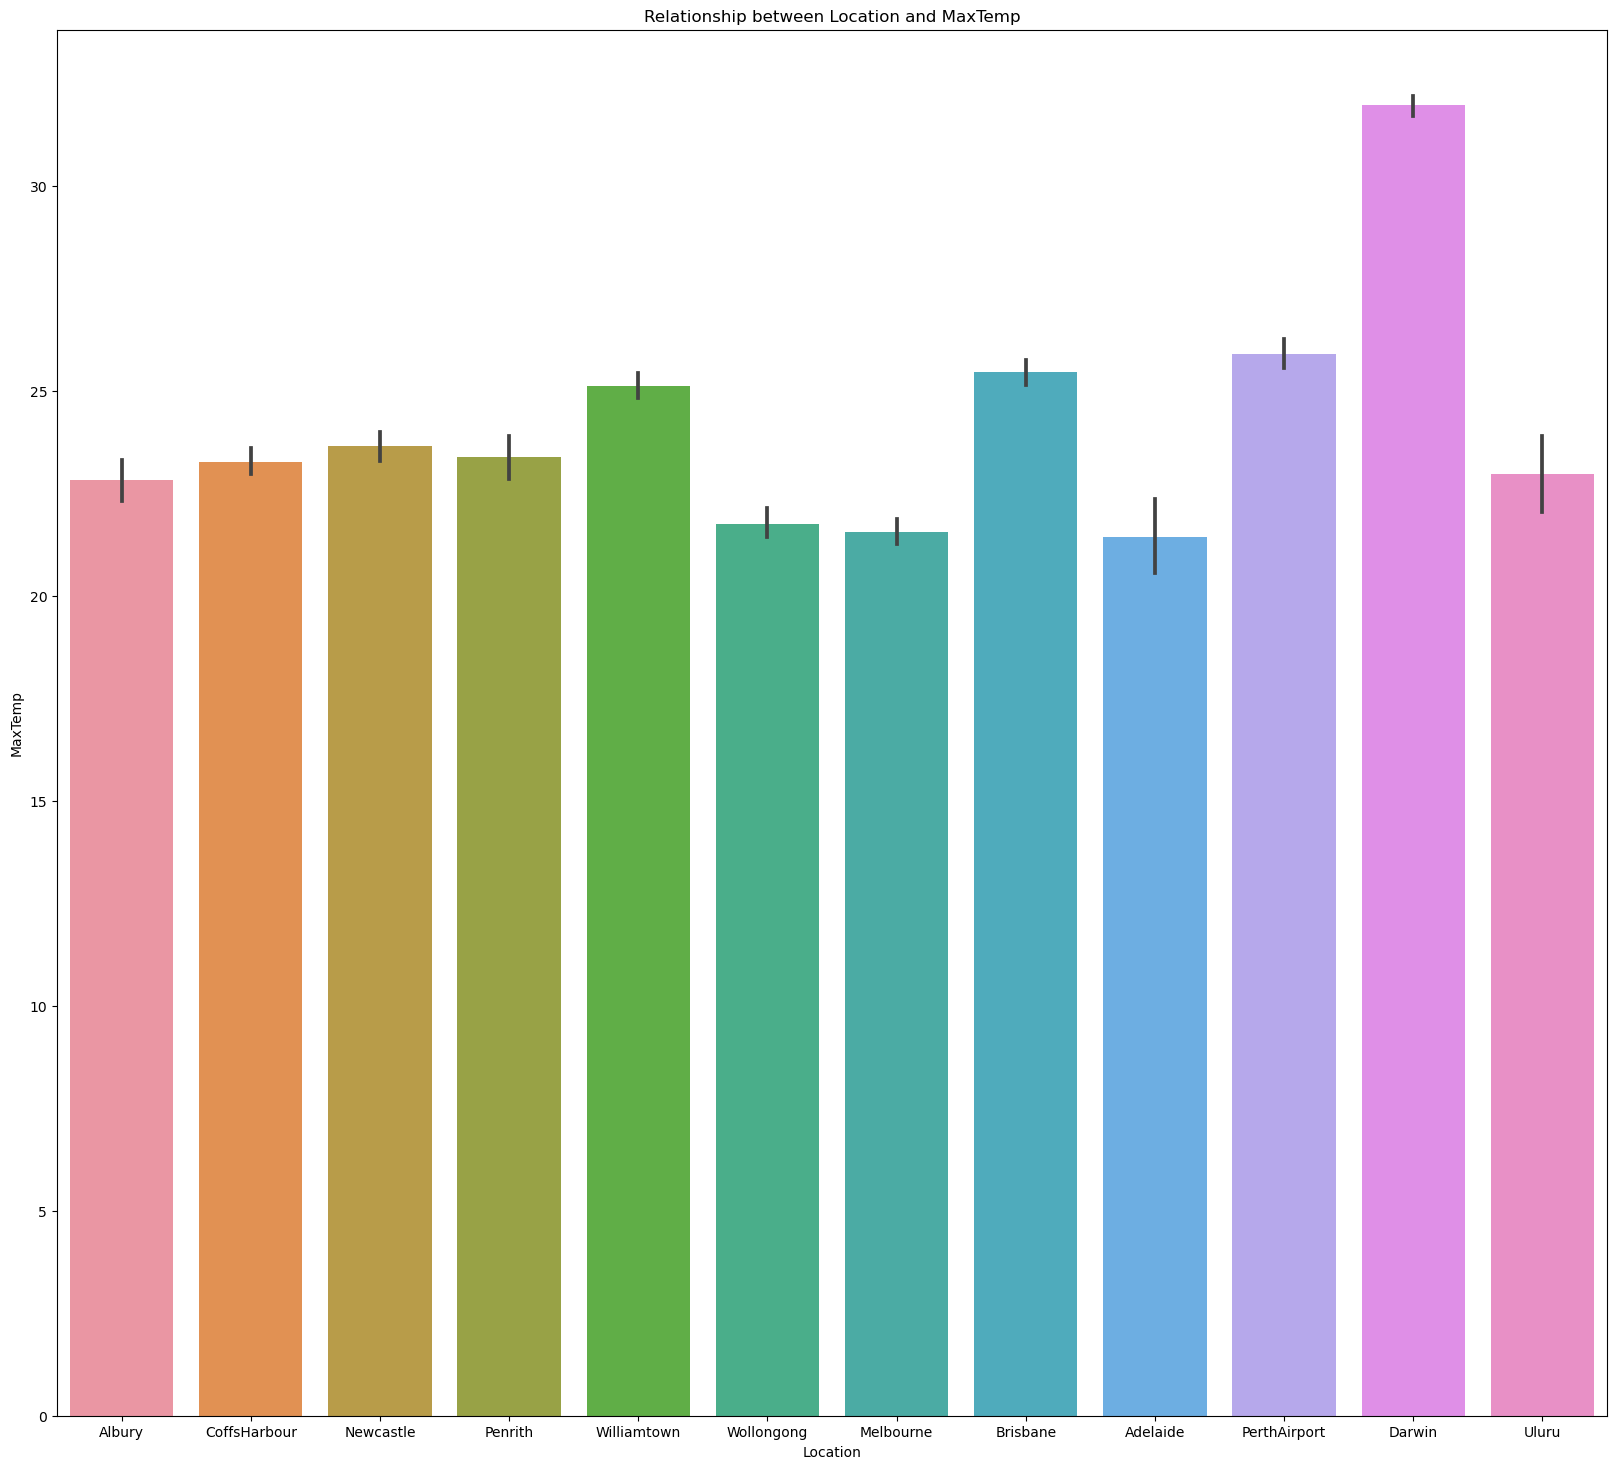

In [66]:
plt.figure(figsize=(20,18))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Location", y="MaxTemp", data=df)

# Set labels and title
plt.xlabel("Location")
plt.ylabel("MaxTemp")
plt.title("Relationship between Location and MaxTemp")

# Show the plot
plt.show()

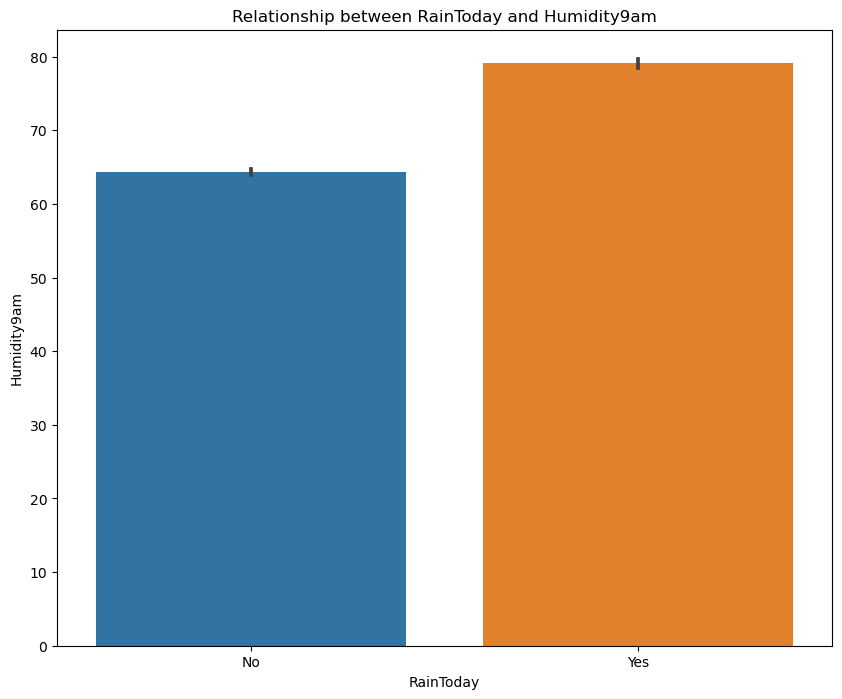

In [67]:
plt.figure(figsize=(10,8))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainToday", y="Humidity9am", data=df)

# Set labels and title
plt.xlabel("RainToday")
plt.ylabel("Humidity9am")
plt.title("Relationship between RainToday and Humidity9am")

# Show the plot
plt.show()

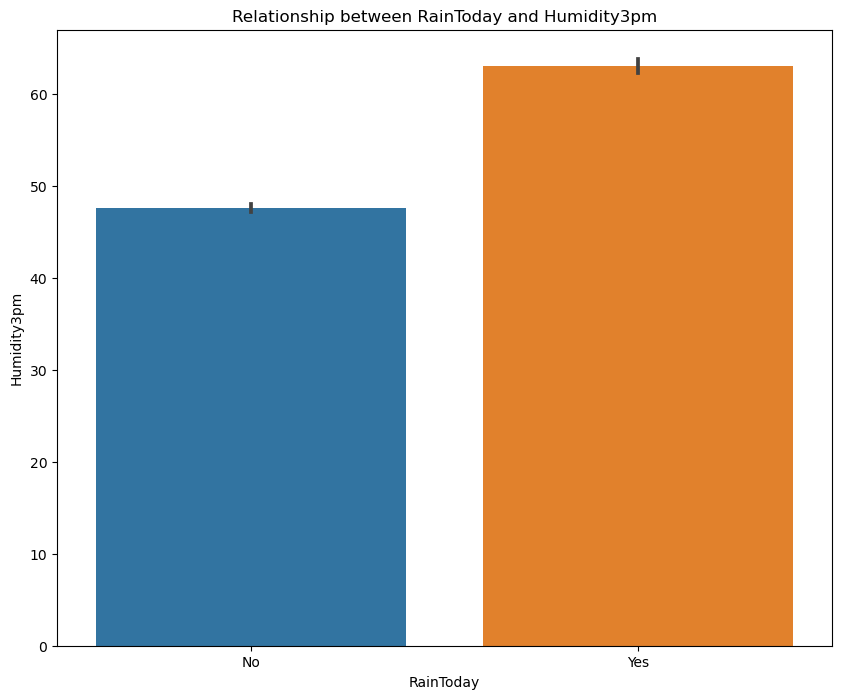

In [68]:
plt.figure(figsize=(10,8))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainToday", y="Humidity3pm", data=df)

# Set labels and title
plt.xlabel("RainToday")
plt.ylabel("Humidity3pm")
plt.title("Relationship between RainToday and Humidity3pm")

# Show the plot
plt.show()

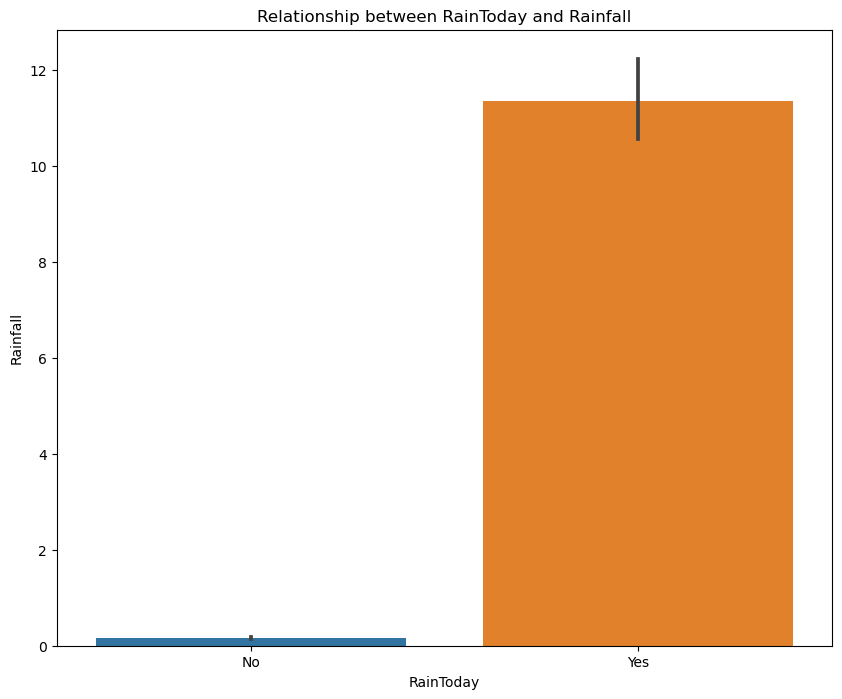

In [69]:
plt.figure(figsize=(10,8))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="RainToday", y="Rainfall", data=df)

# Set labels and title
plt.xlabel("RainToday")
plt.ylabel("Rainfall")
plt.title("Relationship between RainToday and Rainfall")

# Show the plot
plt.show()

# Checking for outliers

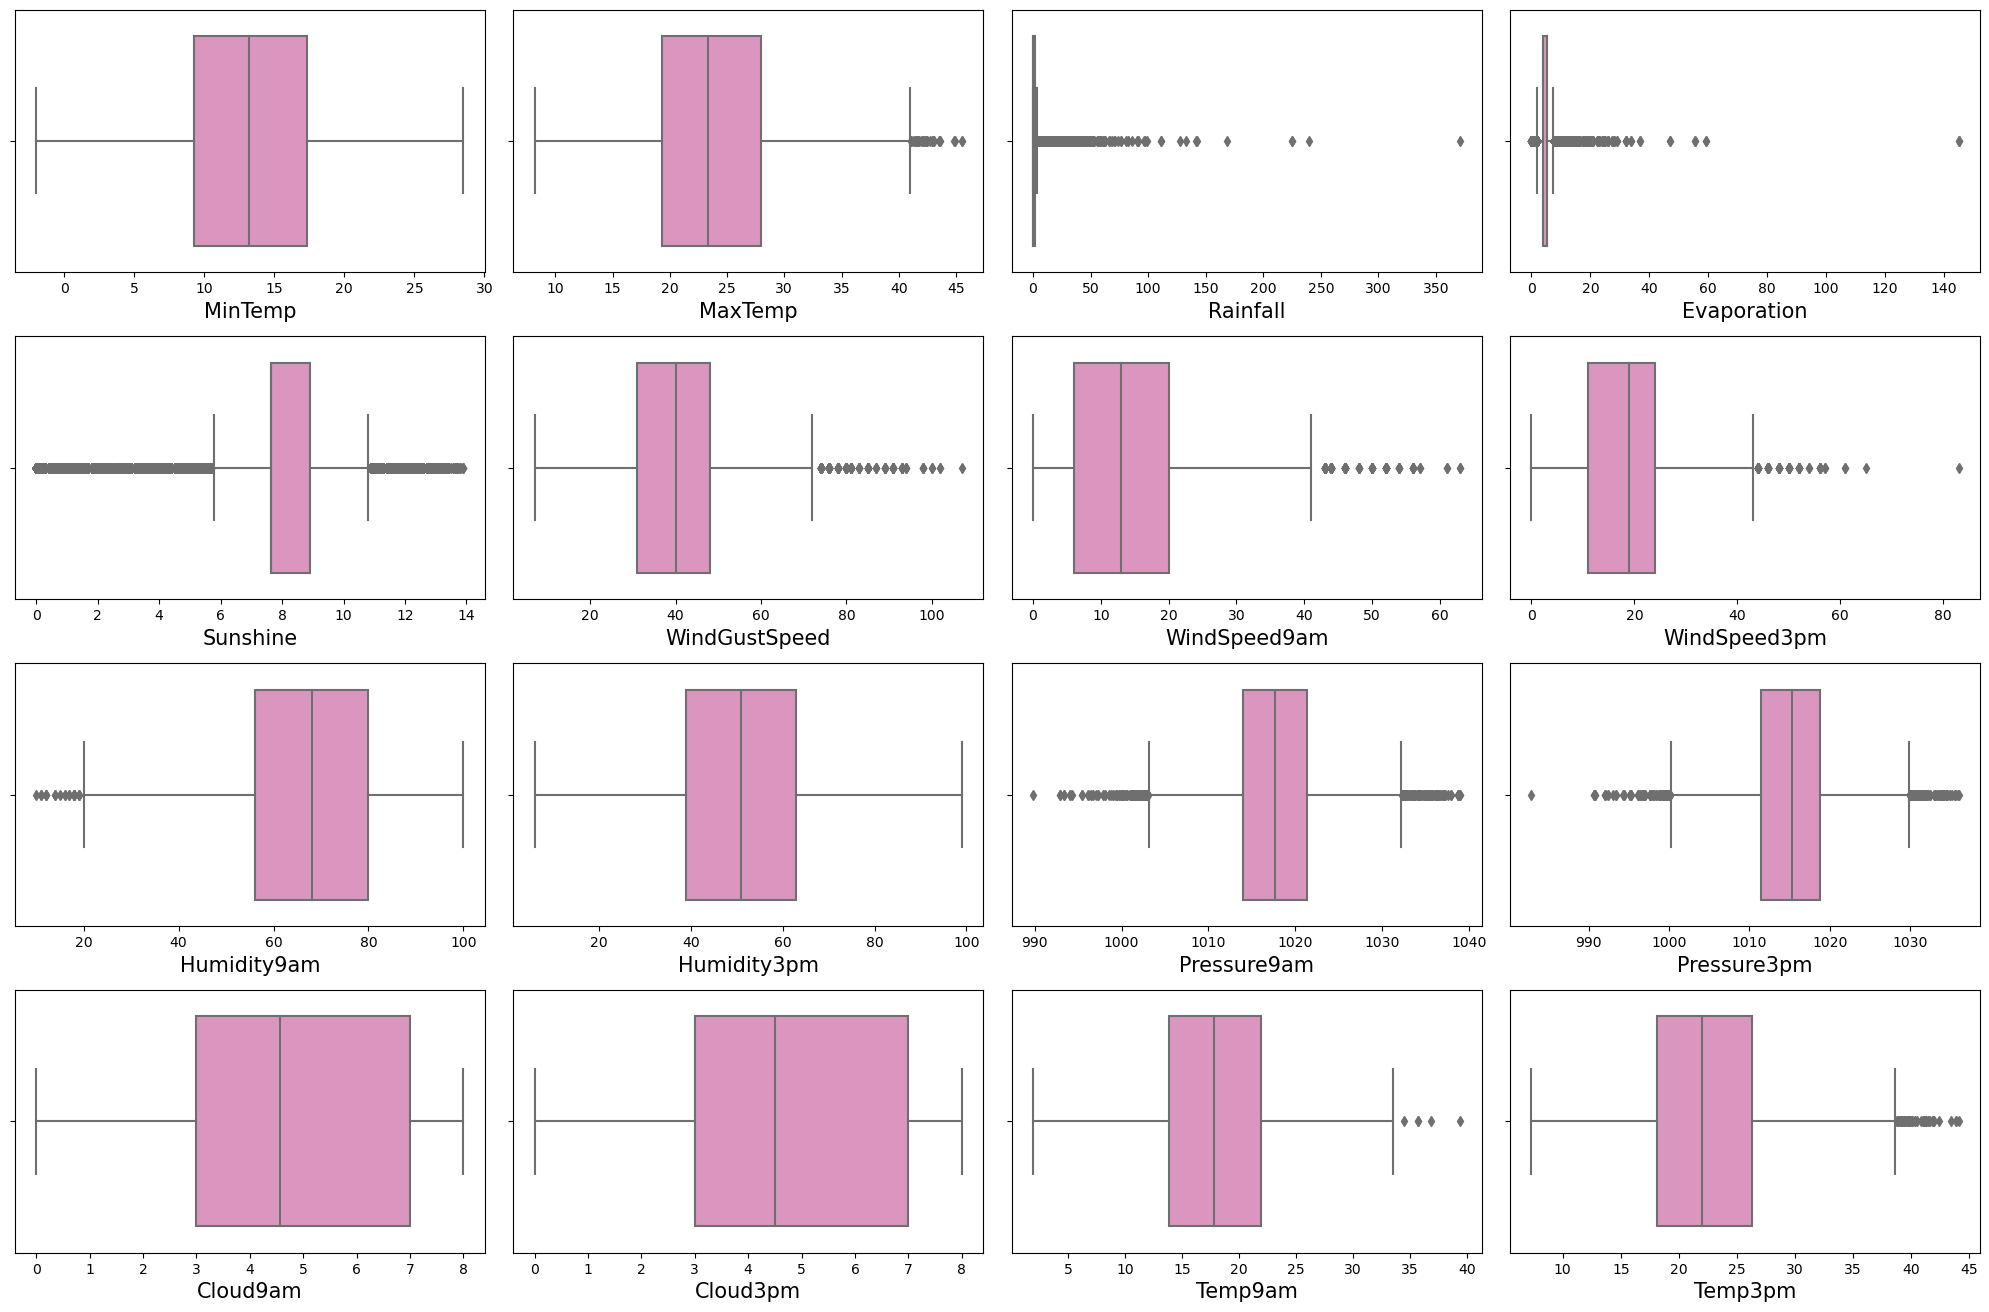

In [70]:
 num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

# Usng IQR method removed outliers

In [71]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
           Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                       
2008-12-01   Albury     13.4  22.900000       0.6     5.389395  7.632205   
2008-12-02   Albury      7.4  25.100000       0.0     5.389395  7.632205   
2008-12-03   Albury     12.9  25.700000       0.0     5.389395  7.632205   
2008-12-04   Albury      9.2  28.000000       0.0     5.389395  7.632205   
2008-12-05   Albury     17.5  32.300000       1.0     5.389395  7.632205   
...             ...      ...        ...       ...          ...       ...   
2017-06-21    Uluru      2.8  23.400000       0.0     5.389395  7.632205   
2017-06-22    Uluru      3.6  25.300000       0.0     5.389395  7.632205   
2017-06-23    Uluru      5.4  26.900000       0.0     5.389395  7.632205   
2017-06-24    Uluru      7.8  27.000000       0.0     5.389395  7.632205   
2017-06-25    Uluru     14.9  23.859976       0.0    

In [72]:
df1.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Ordinal Encoder

In [73]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
OE = OrdinalEncoder()

# Dictionary to store mappings for each categorical column
mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtypes == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[col].values.reshape(-1, 1))
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
             Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                        
2008-12-01       1.0     13.4  22.900000       0.6     5.389395  7.632205   
2008-12-02       1.0      7.4  25.100000       0.0     5.389395  7.632205   
2008-12-03       1.0     12.9  25.700000       0.0     5.389395  7.632205   
2008-12-04       1.0      9.2  28.000000       0.0     5.389395  7.632205   
2008-12-05       1.0     17.5  32.300000       1.0     5.389395  7.632205   
...              ...      ...        ...       ...          ...       ...   
2017-06-21       9.0      2.8  23.400000       0.0     5.389395  7.632205   
2017-06-22       9.0      3.6  25.300000       0.0     5.389395  7.632205   
2017-06-23       9.0      5.4  26.900000       0.0     5.389395  7.632205   
2017-06-24       9.0      7.8  27.000000       0.0     5.389395  7.632205   
2017-06-25       9.0     14.9  23.859976       0.0     5

# Checking how the data is distributed

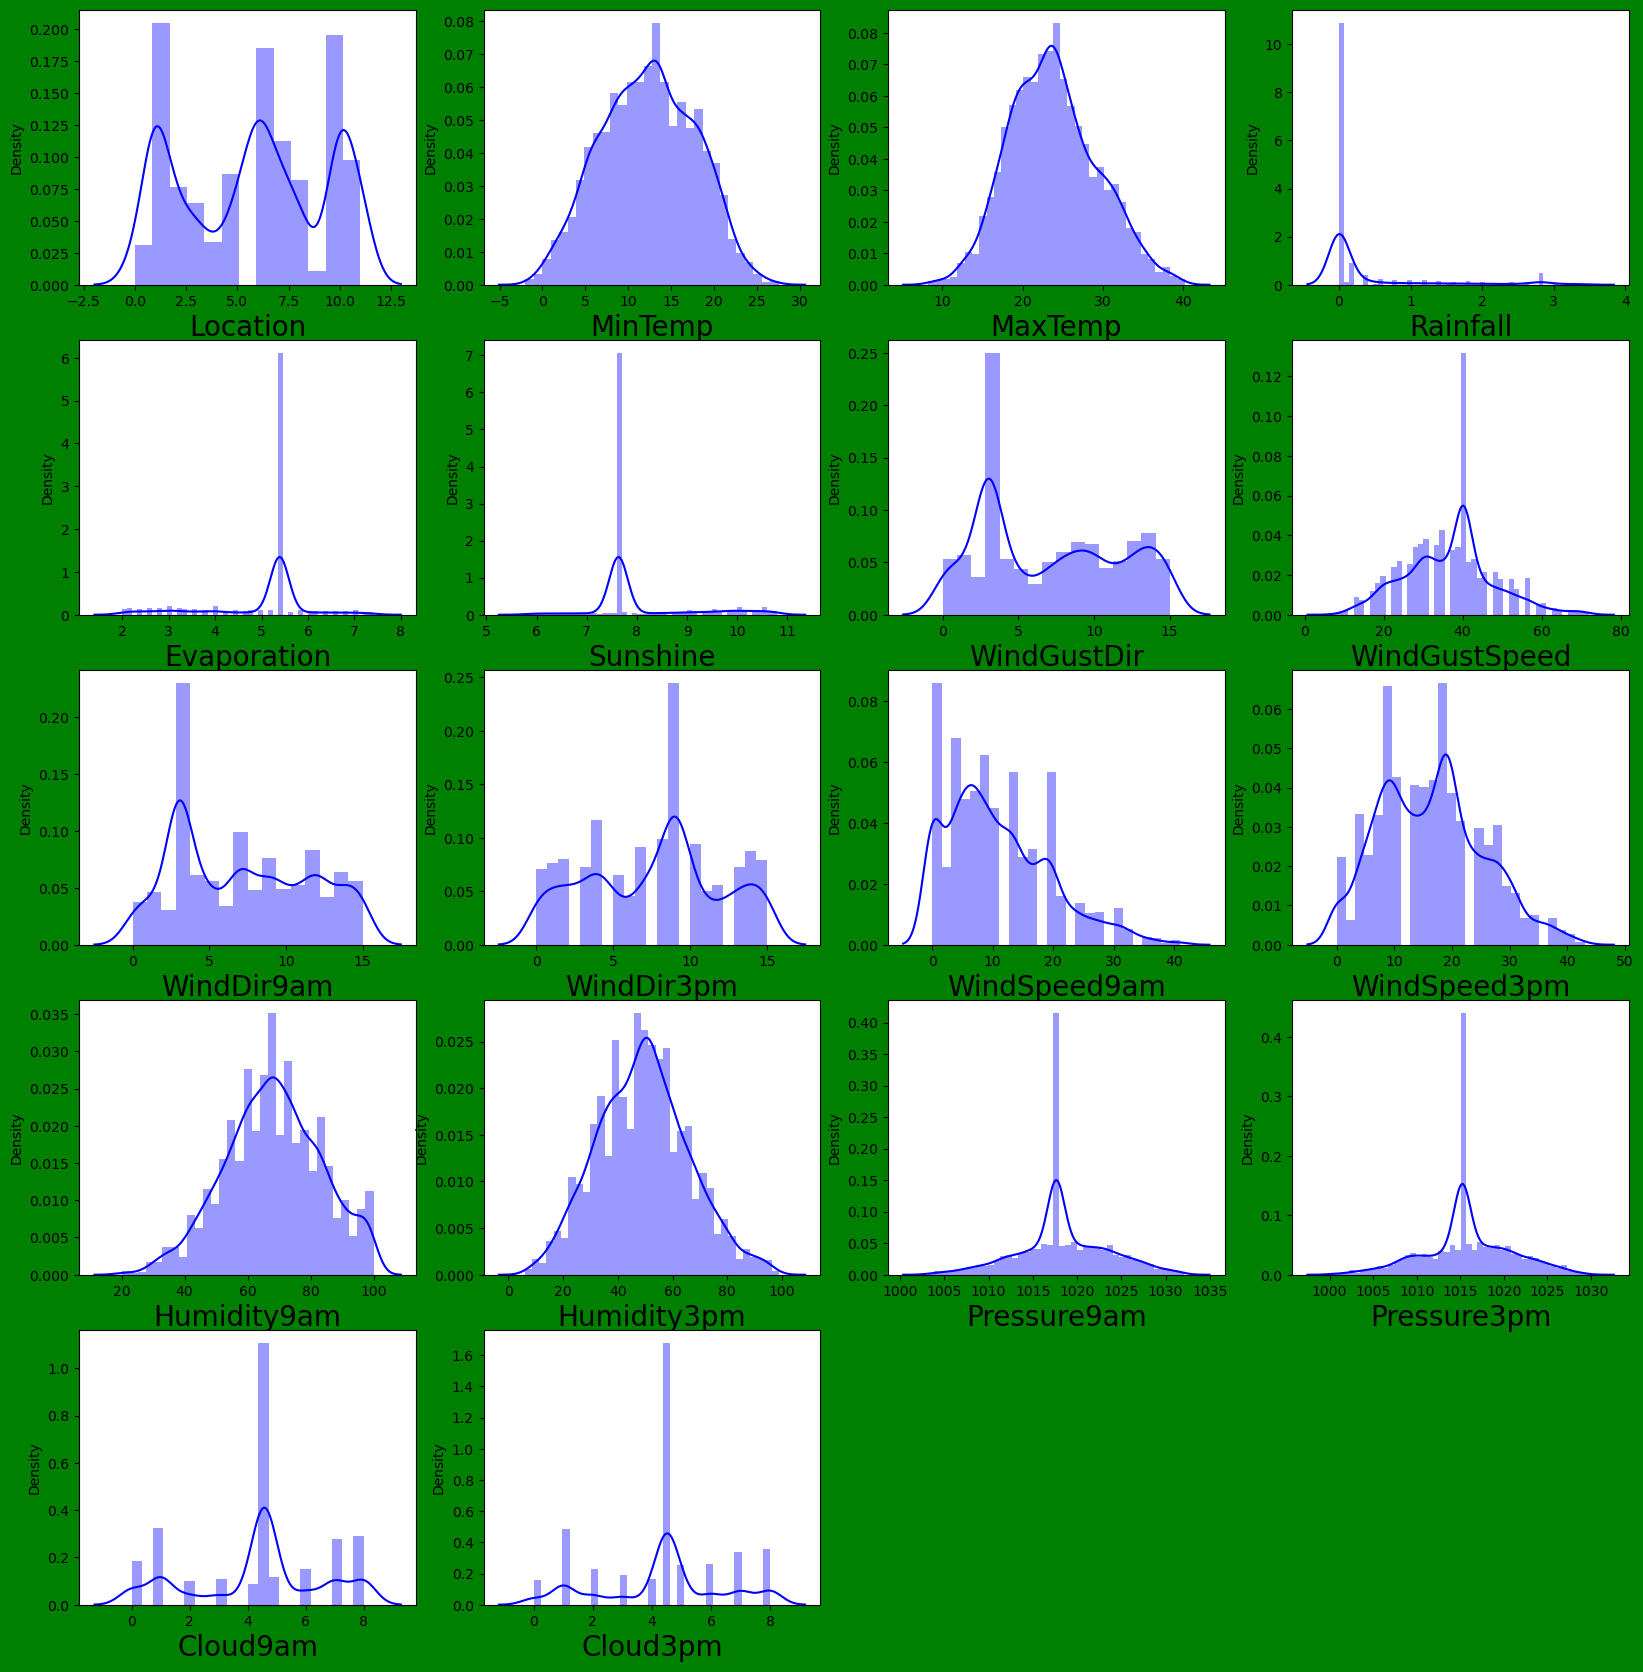

In [74]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [75]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

Location        -0.064207
MinTemp         -0.020278
MaxTemp          0.264623
Rainfall         2.524949
Evaporation     -1.198114
Sunshine         1.396835
WindGustDir      0.227150
WindGustSpeed    0.205595
WindDir9am       0.236963
WindDir3pm      -0.059550
WindSpeed9am     0.806646
WindSpeed3pm     0.327999
Humidity9am     -0.104656
Humidity3pm      0.173004
Pressure9am      0.010574
Pressure3pm     -0.059981
Cloud9am        -0.300528
Cloud3pm        -0.219405
Temp9am         -0.141346
Temp3pm          0.287313
RainToday        2.870837
RainTomorrow     1.797527
dtype: float64

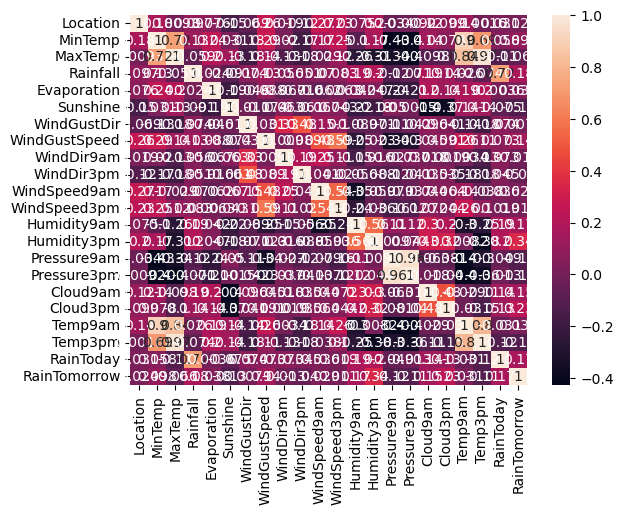

In [76]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

Almost all columns skewness is right

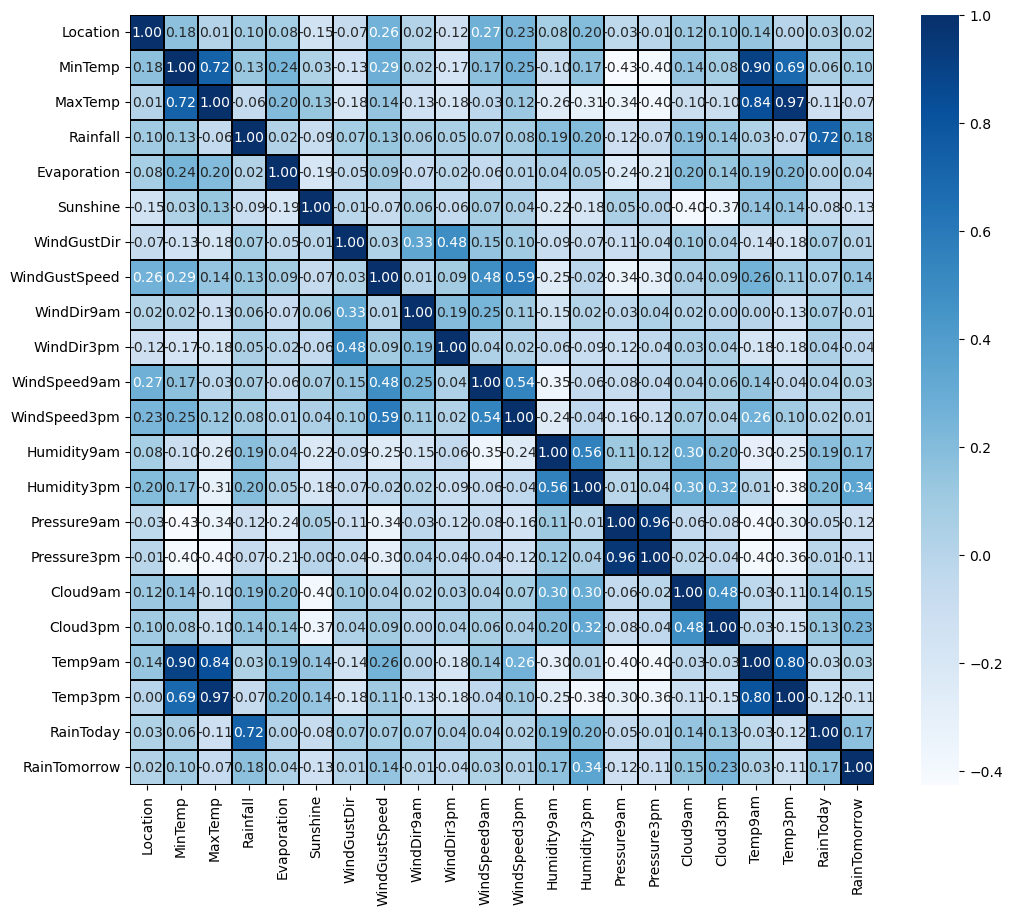

In [77]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

In [78]:
# Removing skewness using cuberoot method
df1['Humidity3pm']=np.cbrt(df1['Humidity3pm'])

In [79]:
# Removing skewness using cuberoot method
df1['RainToday']=np.cbrt(df1['RainToday'])

# Visualizing the correlation between label and features using bar plot

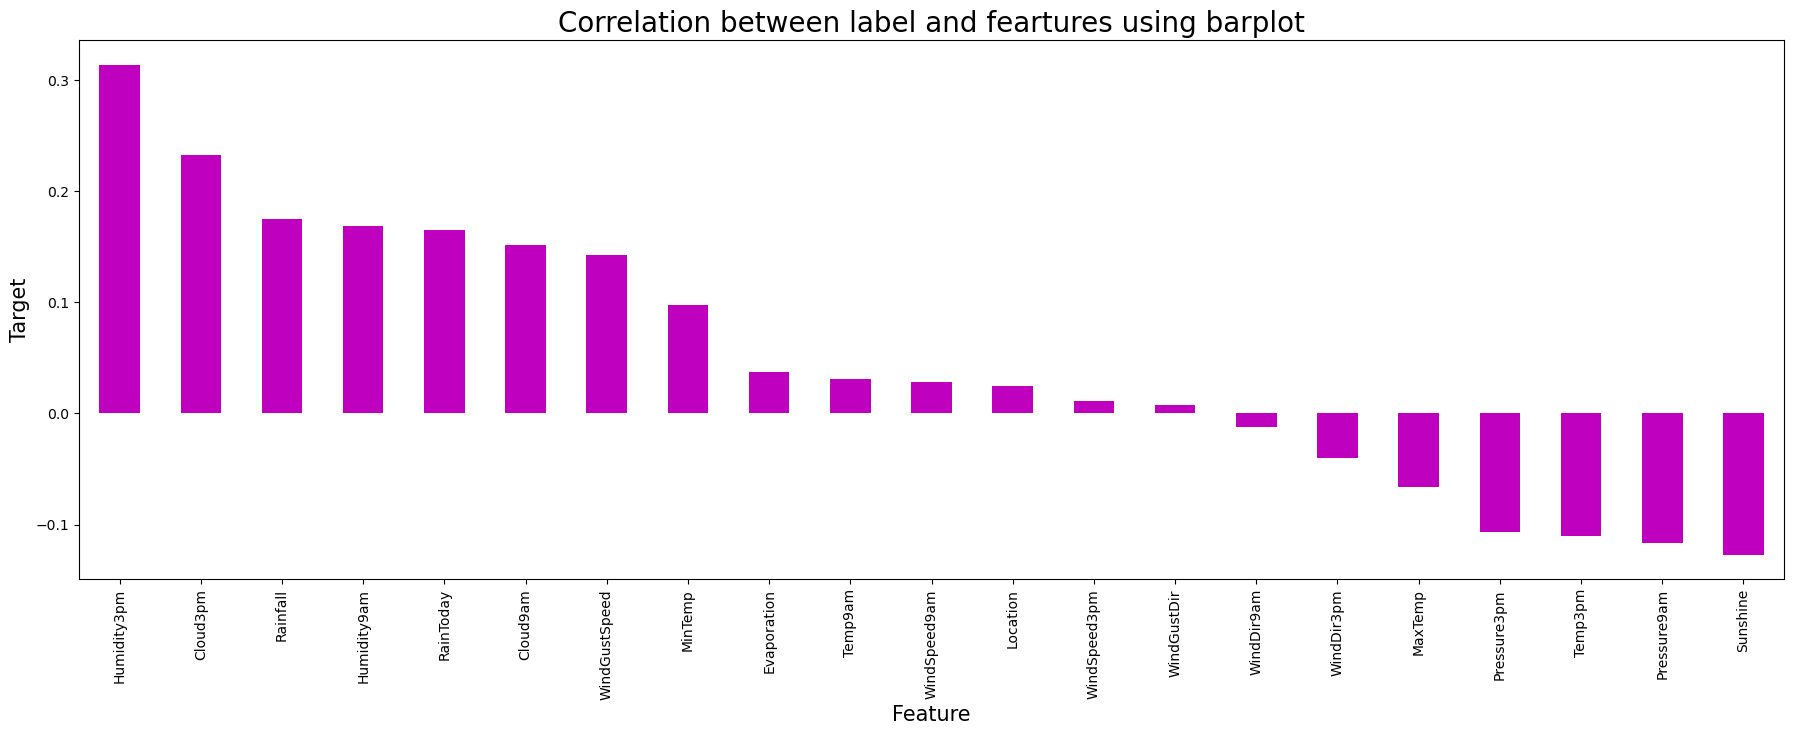

In [80]:
plt.figure(figsize=(22,7))
df1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and feartures using barplot",fontsize=20)
plt.show()

# Separating Features and  Label

In [81]:
# Separating the independent and target varaible into x and y
x = df1.drop(['RainTomorrow'], axis=1)  # Features we remove price columns
y = df1['RainTomorrow']    #  Here now the price is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (4221, 21)
Label Dimensions (4221,)


# StandardScaler

In [82]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame (for demonstration)
original_x = x.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame 'x' using StandardScaler
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Perform some operations on the scaled data (for demonstration)
# Example: Multiply each feature by 2
x_scaled = x_scaled * 2


# 'x_restored' now contains the original values of 'x' before scaling
print("Original DataFrame (x):")
print(original_x)
print("\nDataFrame after scaling and operation (x_scaled):")
print(x_scaled)

Original DataFrame (x):
            Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                        
2008-12-01       1.0     13.4  22.900000       0.6     5.389395  7.632205   
2008-12-02       1.0      7.4  25.100000       0.0     5.389395  7.632205   
2008-12-03       1.0     12.9  25.700000       0.0     5.389395  7.632205   
2008-12-04       1.0      9.2  28.000000       0.0     5.389395  7.632205   
2008-12-05       1.0     17.5  32.300000       1.0     5.389395  7.632205   
...              ...      ...        ...       ...          ...       ...   
2017-06-21       9.0      2.8  23.400000       0.0     5.389395  7.632205   
2017-06-22       9.0      3.6  25.300000       0.0     5.389395  7.632205   
2017-06-23       9.0      5.4  26.900000       0.0     5.389395  7.632205   
2017-06-24       9.0      7.8  27.000000       0.0     5.389395  7.632205   
2017-06-25       9.0     14.9  23.859976       0.0  

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x_scaled.values,i)for i in range (len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,Vif Values,Features
0,1.268247,Location
1,8.891758,MinTemp
2,20.761732,MaxTemp
3,2.182822,Rainfall
4,1.187453,Evaporation
5,1.402765,Sunshine
6,1.515535,WindGustDir
7,2.018123,WindGustSpeed
8,1.274739,WindDir9am
9,1.470077,WindDir3pm


In [84]:
x_restored = pd.DataFrame(scaler.inverse_transform(x_scaled), columns=x.columns)

In [85]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,...,24.0,71.0,2.802039,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0
2008-12-02,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,...,22.0,44.0,2.924018,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0
2008-12-03,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,...,26.0,38.0,3.107233,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0
2008-12-04,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,...,9.0,45.0,2.519842,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0
2008-12-05,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,...,20.0,82.0,3.207534,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,...,11.0,51.0,2.884499,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0
2017-06-22,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,...,9.0,56.0,2.758924,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0
2017-06-23,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,...,9.0,53.0,2.884499,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0


In [86]:
y.value_counts()

0.0    3521
1.0     700
Name: RainTomorrow, dtype: int64

# Oversampling 

In [87]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [88]:
y1.value_counts()

0.0    3521
1.0    3521
Name: RainTomorrow, dtype: int64

# Classification Algorithm

In [89]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Find the best random state and accuracy

In [90]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [91]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.9460482725982016 at random_state 47


Here you can see that 95 % in my maximum accuracy is 91 and random state is 2

# Creating Train Test Split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30,random_state=maxRS)

# Random Forest Classifier

In [93]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.9384761003312825
Confusion Matrix:
[[1002   56]
 [  74  981]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1058
         1.0       0.95      0.93      0.94      1055

    accuracy                           0.94      2113
   macro avg       0.94      0.94      0.94      2113
weighted avg       0.94      0.94      0.94      2113



# Support Vector Machine Classifier

In [94]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.6639848556554662
Confusion Matrix:
[[537 521]
 [189 866]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.51      0.60      1058
         1.0       0.62      0.82      0.71      1055

    accuracy                           0.66      2113
   macro avg       0.68      0.66      0.66      2113
weighted avg       0.68      0.66      0.66      2113



# Gradient Boosting Classifier

In [95]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.8793185044959773
Confusion Matrix:
[[940 118]
 [137 918]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1058
         1.0       0.89      0.87      0.88      1055

    accuracy                           0.88      2113
   macro avg       0.88      0.88      0.88      2113
weighted avg       0.88      0.88      0.88      2113



# Ada Boost Classifier

In [96]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.8078561287269286
Confusion Matrix:
[[856 202]
 [204 851]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1058
         1.0       0.81      0.81      0.81      1055

    accuracy                           0.81      2113
   macro avg       0.81      0.81      0.81      2113
weighted avg       0.81      0.81      0.81      2113



# BaggingClassifier

In [97]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 0.914339801230478
Confusion Matrix:
[[999  59]
 [122 933]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      1058
         1.0       0.94      0.88      0.91      1055

    accuracy                           0.91      2113
   macro avg       0.92      0.91      0.91      2113
weighted avg       0.92      0.91      0.91      2113



# Extra Trees Classifier

In [98]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.9555134879318504
Confusion Matrix:
[[1005   53]
 [  41 1014]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1058
         1.0       0.95      0.96      0.96      1055

    accuracy                           0.96      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.96      0.96      0.96      2113



Now this is my  Extra Tree Classifier best accuracy.

# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],  
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]} 

In [100]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [102]:
GCV.best_params_ 

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [103]:
Model = ExtraTreesClassifier(criterion = "gini" , max_depth = 20,n_jobs = -2,random_state = 50,n_estimators = 200)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

95.03076194983436


# Saving the model using joblib

In [104]:
# Saving the model
import joblib
joblib.dump(Model,"rainfall_weather_predict.pkl")

['rainfall_weather_predict.pkl']

In [105]:
import pickle
filename = "rainfall_weather_predict.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [106]:
load_model = pickle.load(open("rainfall_weather_predict.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

95.03076194983436


In [107]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No


# Make the diagram to predict the rain tomorrow or not

In [108]:
import joblib
import numpy as np

# Define the mapping dictionaries
Location_mapping = {'Albury': 1.0, 'CoffsHarbour': 3.0, 'Newcastle': 6.0, 'Penrith': 7.0, 'Williamtown': 10.0, 'Wollongong': 11.0, 'Melbourne': 5.0, 'Brisbane': 2.0, 'Adelaide': 0.0, 'PerthAirport': 8.0, 'Darwin': 4.0, 'Uluru': 9.0}
WindGustDir_mapping = {'W': 13.0, 'WNW': 14.0, 'WSW': 15.0, 'NE': 4.0, 'N': 3.0, 'NNE': 5.0, 'ENE': 1.0, 'SSE': 10.0, 'S': 8.0, 'SW': 12.0, 'NNW': 6.0, 'SE': 9.0, 'E': 0.0, 'NW': 7.0, 'SSW': 11.0, 'ESE': 2.0}
WindDir9am_mapping = {'W': 13.0, 'NNW': 6.0, 'SE': 9.0, 'ENE': 1.0, 'SW': 12.0, 'SSE': 10.0, 'S': 8.0, 'NE': 4.0, 'N': 3.0, 'SSW': 11.0, 'ESE': 2.0, 'E': 0.0, 'NW': 7.0, 'WSW': 15.0, 'WNW': 14.0, 'NNE': 5.0}
WindDir3pm_mapping = {'WNW': 14.0, 'WSW': 15.0, 'E': 0.0, 'NW': 7.0, 'W': 13.0, 'SSE': 10.0, 'ESE': 2.0, 'ENE': 1.0, 'NNW': 6.0, 'SE': 9.0, 'N': 3.0, 'SW': 12.0, 'SSW': 11.0, 'S': 8.0, 'NNE': 5.0, 'NE': 4.0}
RainToday_mapping = {'No': 0.0, 'Yes': 1.0}
RainTomorrow_mapping = {'No': 0.0, 'Yes': 1.0}

# Define the input data 
input_data = ["Albury",7.4,25.1,0.0,5.389395,10.632205,"WNW",44,"NNW","WSW",4,22,44,25,1010.6,1007.8,4.566622,4.503183,17.2,24.3,"No"]

# Map categorical values to numerical values
input_data_numerical = [
    Location_mapping[input_data[0]],
    input_data[1],
    input_data[2],
    input_data[3],
    input_data[4],
    input_data[5],
    WindGustDir_mapping[input_data[6]],
    input_data[7],
    WindDir9am_mapping[input_data[8]],
    WindDir3pm_mapping[input_data[9]],
    input_data[10],
    input_data[11],
    input_data[12],
    input_data[13],
    input_data[14],
    input_data[15],
    input_data[16],
    input_data[17], 
    input_data[18],
    input_data[19],
    RainToday_mapping[input_data[20]]
]

# Load your trained model
model = joblib.load('rainfall_weather_predict.pkl')

# Make prediction using the trained model
prediction = Model.predict([input_data_numerical])

# Print the input data and predicted rainfall
print("Input Data (Numerical):", input_data_numerical)
print("Predicted tomorrow rain or not:", 'Yes' if prediction[0] == 1 else 'No')
print(prediction)

Input Data (Numerical): [1.0, 7.4, 25.1, 0.0, 5.389395, 10.632205, 14.0, 44, 6.0, 15.0, 4, 22, 44, 25, 1010.6, 1007.8, 4.566622, 4.503183, 17.2, 24.3, 0.0]
Predicted tomorrow rain or not: No
[0.]


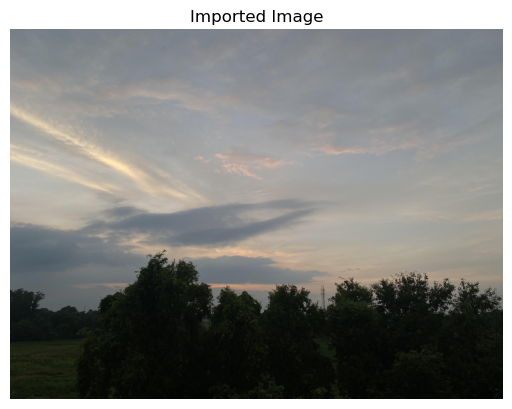

There will be no rain tomorrow


In [109]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the condition # Change this condition as per your requirement

if prediction == 0:
    # Load and display the first image
    image_path = "C:/Users/ssour/Downloads/clear image.jpg"  # Specify the path to the first image file
elif prediction == 1:
    # Load and display the second image
    image_path = "C:/Users/ssour/Downloads/rain images.jpg"  # Specify the path to the second image file
else:
    # Default behavior if prediction is neither 1 nor 0
    print("Invalid prediction value. No image to display.")
    image_path = None

if image_path:
    # Open and display the image using matplotlib
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title('Imported Image')
    plt.axis('off')  # Turn off axis
    plt.show()

if prediction == 0:
    print("There will be no rain tomorrow")
else:
    print("There will be heavy rain tomorrow")

# Now we predict the rainfall using regression

In these time my rainfall columns is my target variable

# Separating Feature and Label

In [110]:
# Separating the independent and target varaible into x and y
x = df1.drop("Rainfall", axis = 1)
y = df1["Rainfall"]
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (4221, 21)
Label Dimensions (4221,)


# Finding the best model

In [111]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Find the best random state and accuracy

In [112]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    
    # Initializing and training the ExtraTreesRegressor
    ETR = ExtraTreesRegressor()
    ETR.fit(x_train, y_train)
    pred = ETR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.8211654752855031 on Random_State 183


# Creating train test split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [114]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (1267, 21)
y_test shape: (1267,)
x_train shape: (2954, 21)
y_train shape: (2954,)


# Random Forest Regressor

In [115]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.7851686780744308
R2_Score on training Data:  95.06317247877931
Mean Absolute error:- 0.2006681178239137
Mean Squared error:- 0.12222496972070523
Root Mean Squared Error:- 0.349606878823494


# KNN

In [116]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.08545511628810354
R2_Score on training Data:  38.91708887124762
Mean Absolute error:- 0.41215517248860817
Mean Squared error:- 0.5203162170115957
Root Mean Squared Error:- 0.7213294788178255


# Gradient Boosting Regressor

In [117]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.6314573732403874
R2_Score on training Data:  72.34918562750073
Mean Absolute error:- 0.24741694006139636
Mean Squared error:- 0.2096766476728623
Root Mean Squared Error:- 0.45790462726736264


# Lasso

In [118]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_lasso))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared error:-",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_Score:  0.035058526212403573
R2_Score on training Data:  3.7490140743391076
Mean Absolute error:- 0.4845647016046984
Mean Squared error:- 0.5489885802443805
Root Mean Squared Error:- 0.7409376358671359


# Decision Tree Regressor

In [119]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.6059257451936113
R2_Score on training Data:  99.18641706034362
Mean Absolute error:- 0.16458337411448648
Mean Squared error:- 0.22420247396749676
Root Mean Squared Error:- 0.4735002365020495


# Extra Trees Regressor

In [120]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.8217638987950855
R2_Score on training Data:  99.18641706034362
Mean Absolute error:- 0.15572354852442954
Mean Squared error:- 0.10140468288164635
Root Mean Squared Error:- 0.31844101947086895


# Checking Cross validation score of each algorithm

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.51293651 0.61871855 0.86084113 0.6976037  0.53218232]
0.6444564383330599
Difference between R2 score and cross validation score is- 14.071223974137093


In [123]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.2146837  -0.0635891   0.23599403  0.19533112 -0.27260089]
-0.023909708834450493
Difference between R2 score and cross validation score is- 10.936482512255404


In [124]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.48556467 0.60023068 0.64791807 0.50665268 0.54858957]
0.5577911336121977
Difference between R2 score and cross validation score is- 7.3666239628189745


In [125]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[ 0.03418794  0.03410842  0.01454639 -0.00722536  0.02254609]
0.019632698199489963
Difference between R2 score and cross validation score is- 1.542582801291361


In [126]:
score6 =cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_etr)-score6.mean())*100)

[0.58482707 0.59395589 0.91811963 0.75597387 0.61332986]
0.6932412635032467
Difference between R2 score and cross validation score is- 12.852263529183883


My Extra tree regressor is my best accuracy

# Hyper Parameter Tuning

In [127]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [128]:
etr = ExtraTreesRegressor(random_state=maxRS)

In [129]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  -0.20554396229295654


In [2]:
Model = ExtraTreesRegressor(max_depth = 20,max_features = 'sqrt',min_samples_leaf = 1,min_samples_split = 2, n_estimators= 200)

NameError: name 'ExtraTreesRegressor' is not defined

In [131]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print("R2_Score: ",r2_score(y_test,pred))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred))
print("Mean Squared error:-",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.8268549020789286
R2_Score on training Data:  99.18641706034362
Mean Absolute error:- 0.1581021435963709
Mean Squared error:- 0.09850823502367842
Root Mean Squared Error:- 0.31386021573891526


Almost 82 % accuracy

# Saving the model using joblib

In [132]:
# Saving the model
import joblib
joblib.dump(Model,"Rainfall_weather_predict.pkl")

['Rainfall_weather_predict.pkl']

In [133]:
import pickle
filename = "Rainfall_weather_predict.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [134]:
load_model = pickle.load(open("Rainfall_weather_predict.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

82.68549020789287


# Predict the rainfall values

In [135]:
import joblib
import numpy as np

# Define the mapping dictionaries
Location_mapping = {'Albury': 1.0, 'CoffsHarbour': 3.0, 'Newcastle': 6.0, 'Penrith': 7.0, 'Williamtown': 10.0, 'Wollongong': 11.0, 'Melbourne': 5.0, 'Brisbane': 2.0, 'Adelaide': 0.0, 'PerthAirport': 8.0, 'Darwin': 4.0, 'Uluru': 9.0}
WindGustDir_mapping = {'W': 13.0, 'WNW': 14.0, 'WSW': 15.0, 'NE': 4.0, 'N': 3.0, 'NNE': 5.0, 'ENE': 1.0, 'SSE': 10.0, 'S': 8.0, 'SW': 12.0, 'NNW': 6.0, 'SE': 9.0, 'E': 0.0, 'NW': 7.0, 'SSW': 11.0, 'ESE': 2.0}
WindDir9am_mapping = {'W': 13.0, 'NNW': 6.0, 'SE': 9.0, 'ENE': 1.0, 'SW': 12.0, 'SSE': 10.0, 'S': 8.0, 'NE': 4.0, 'N': 3.0, 'SSW': 11.0, 'ESE': 2.0, 'E': 0.0, 'NW': 7.0, 'WSW': 15.0, 'WNW': 14.0, 'NNE': 5.0}
WindDir3pm_mapping = {'WNW': 14.0, 'WSW': 15.0, 'E': 0.0, 'NW': 7.0, 'W': 13.0, 'SSE': 10.0, 'ESE': 2.0, 'ENE': 1.0, 'NNW': 6.0, 'SE': 9.0, 'N': 3.0, 'SW': 12.0, 'SSW': 11.0, 'S': 8.0, 'NNE': 5.0, 'NE': 4.0}
RainToday_mapping = {'No': 0.0, 'Yes': 1.0}
RainTomorrow_mapping = {'No': 0.0, 'Yes': 1.0}

# Define the input data 
input_data = ["Albury", 7.4, 25.1, 5.389395,10.632205, "WNW", 44, "NNW", "WSW", 4, 22, 44, 25, 1010.6, 1007.8, 4.566622, 4.503183, 17.2, 24.3, "No","No"]

# Map categorical values to numerical values
input_data_numerical = [
    Location_mapping[input_data[0]],
    input_data[1],
    input_data[2],
    input_data[3],
    input_data[4],
    WindGustDir_mapping[input_data[5]],
    input_data[6],
    WindDir9am_mapping[input_data[7]],
    WindDir3pm_mapping[input_data[8]],
    input_data[9],
    input_data[10],
    input_data[11],
    input_data[12],
    input_data[13],
    input_data[14],
    input_data[15],
    input_data[16],
    input_data[17], 
    input_data[18],
    RainToday_mapping[input_data[19]],
    RainTomorrow_mapping[input_data[20]]
]

# Load your trained model
model = joblib.load('Rainfall_weather_predict.pkl')  # Update the file path as necessary

# Make prediction using the trained model
prediction_rainfall = load_model.predict([input_data_numerical])

# Print the input data and predicted rainfall
print("Input Data (Numerical):",input_data_numerical)
print("Predicted Rainfall values:", prediction_rainfall[0]) 

Input Data (Numerical): [1.0, 7.4, 25.1, 5.389395, 10.632205, 14.0, 44, 6.0, 15.0, 4, 22, 44, 25, 1010.6, 1007.8, 4.566622, 4.503183, 17.2, 24.3, 0.0, 0.0]
Predicted Rainfall values: 0.27829566279780077


In [136]:
print(f"The predicted Rainfall values is: {prediction_rainfall[0]}")
print("Predicted tomorrow rain or not:", 'Yes' if prediction[0] == 1 else 'No')

The predicted Rainfall values is: 0.27829566279780077
Predicted tomorrow rain or not: No


# THANK YOU